<font color='green'>
<center> Machine Learning Model for Breast Cancer Classification </center>
<center>
        Jayabharathi Hari
        <br>
        Mar 2024
</center>

---


Breast cancer is one of the most common cancer types among women, and early detection can be a lifesaving health concern. This study aims to explore the potential of an artificial intelligence-based approach in breast cancer diagnosis.


---


<h3> About the DataSet: </h3>
Dataset : <a href='https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic'>Breast Cancer Wisconsin (Diagnostic)</a> .

1. The dataset given here is about the patients who were
detected with 2 kinds of breast cancer :
  a) Malignant or b) Benign
2. The features given here are the characteristics of the cell nuclei computed from the fine needle aspirate(FNA) of a breast mass.
3. Ten real-valued features are computed for each cell nucleus as follows:

      * radius (mean of distances from center to points on the perimeter)
      * texture (standard deviation of gray-scale values)
      * perimeter
      * area
      * smoothness (local variation in radius lengths)
      * compactness (perimeter^2 / area - 1.0)
      * concavity (severity of concave portions of the contour)
      * concave points (number of concave portions of the contour)
      * symmetry
      * fractal dimension ("coastline approximation" - 1)
4. Mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

* <b> Our Goal in this Problem :</b> <strong> Predict Diagnosis (M = malignant, B
= benign) </strong>
---
<center><h1><font color='green'>General Machine Learning Steps</h1></center>

1. **Data collection, preprocessing (e.g., integration, cleaning, etc.), and exploration.**
2. **Model development**:
    - Assume a **model** $\{f\}$ that is a collection of candidate functions $f$’s (representing posteriori knowledge) we want to discover. Let's assume that each $f$ is parametrized by $\boldsymbol{w}$.
    - Define a **cost function** $C(\boldsymbol{w})$  that measures "how good a particular $f$ can explain the training data." The lower the cost function the better.
3. **Training**:
     - employ an algorithm that finds the best (or good enough) function $f^∗$  in the model that minimizes the cost function over the training dataset.
4. **Testing**:
  - evaluate the performance of the learned $f^*$ using the testing dataset.

---


<center><h1><font color='green'> Machine Learning Pipeling for Given Problem</h1></center>

[1. Load libraries and clean data](#1)

[2. Data analysis](#2)

  * [2.1. Descriptive Statistics](#2.1)
  * [2.2. Outlier detection](#2.2)
  * [2.3. Target distribution](#2.3)
  * [2.4. Joint and marginal Feature distributions](#2.4)
  * [2.5. Correlation matrix](#2.5)

[3.Data preprocessing and Feature Engineering](#3)
  * [3.1. Encoding labels](#3.1)
  * [3.2. Data split](#3.2)
  * [3.3. Feature Engineering](#3.3)
      * [3.3.1 Scaler](#3.3.1)
      * [3.3.2 Dimensionality reduction](#3.3.2)
        * [Principal component analysis (PCA)](#3.3.3)
        * [Recursive features elimination(RFE)](#3.3.4)

[4.Grid Search Cross validation](#4)
  * [4.1. Function to find the best hyperparameters](#4.1)
  * [4.2. Function to find  # of Components in PCA versus Model Accuracy/Training Time](#4.2)

[5. Model Success metrics](#5)
  * [5.1. Confusion Matrices & other Metrics](#5.1)
  * [5.2. ROC curves (AUC)](#5.2)
  * [5.3. Precision-recall curves](#5.3)

[6. Model comparison](#6)
  * [6.1. Decision Tree Classifier](#6.1)
  * [6.0.0 Decision Tree Visualization](#6.0.0)
  * [6.2. Decision Tree Classifier with PCA](#6.2)
      * [6.2.1. # of Components in PCA versus Model Accuracy/Training Time](#6.2.1)
      * [6.2.2. Decision Tree Classifier with PCA (2 components)](#6.2.2)
      * [6.2.3. Adjusting thresholds for metrics](#6.2.3)
  * [6.3. Random Forest](#6.3)
  * [6.4. Random Forest with PCA](#6.4)
      * [6.4.1. # of Components in PCA versus Model Accuracy/Training Time](#6.4.1)
      * [6.4.2. Random Forest with PCA (14 components)](#6.4.2)
  * [6.5. Random Forest with RFE ( Recursive features elimination)](#6.5)
  * [6.6. logisitic Regression](#6.6)
  * [6.7. logistic Regression with PCA](#6.7)
      * [6.7.1. # of Components in PCA versus Model Accuracy/Training Time](#6.7.1)
      * [6.7.2. logistic Regression with PCA (8 components)](#6.7.2)
  * [6.8. Model Performance Plot](#6.8)




<a id='1'></a><br>
#1. Load libraries and clean data

In [ ]:
#Connecting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,cross_val_score, cross_val_predict
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from plotly.subplots import make_subplots
import itertools
from sklearn.linear_model import LogisticRegression
import os
from IPython.display import display

In [ ]:
#Importing the data
Breast_Cancer_df= pd.read_csv('/content/drive/MyDrive/Education/Masters _Data_Science/SIG788_Engineering_AI_solutions/task1/Breast_Cancer_Wisconsin.csv')
Breast_Cancer_df.sample(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
549,923465,B,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,...,31.45,83.9,505.6,0.1204,0.1633,0.06194,0.03264,0.3059,0.07626,NaN
495,914333,B,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,...,28.48,103.9,783.6,0.1216,0.1388,0.17000,0.10170,0.2369,0.06599,NaN
448,911150,B,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,...,28.39,108.1,830.5,0.1089,0.2649,0.37790,0.09594,0.2471,0.07463,NaN
64,85922302,M,12.68,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.06873,...,33.47,111.8,888.3,0.1851,0.4061,0.40240,0.17160,0.3383,0.10310,NaN


In [ ]:
#Checkking the Missing Values.
missing_values_count = Breast_Cancer_df.isnull().sum()
missing_values_count

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
Breast_Cancer_df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

<a id='2'></a><br>
# 2. Data analysis

<a id='2.1'></a><br>
#2.1. Descriptive Statistics]

In [ ]:
Breast_Cancer_df.shape

(569, 31)

In [ ]:
Breast_Cancer_df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
Breast_Cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<a id='2.2'></a><br>
# 2.2. Outlier detection

1. Each of the features appear to have outliers as shown in the boxplot and therefore needs to be addressed during data preprocessing.

2. Most of the features distribution appears to be Gaussian with a right skew.

<ipython-input-98-c526f9488c98>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axes = plt.subplots(1, 2, figsize=(10, 10))


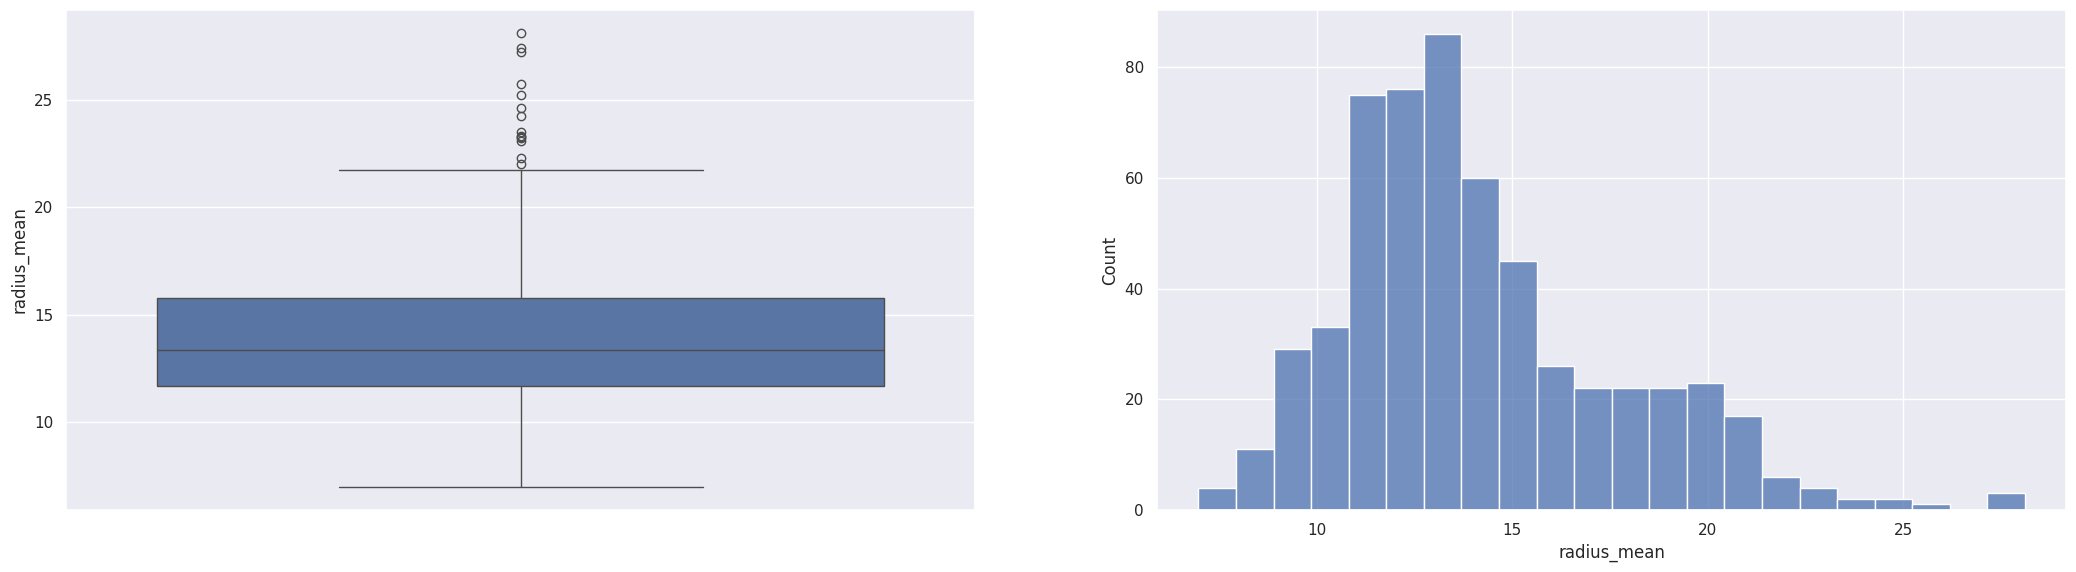

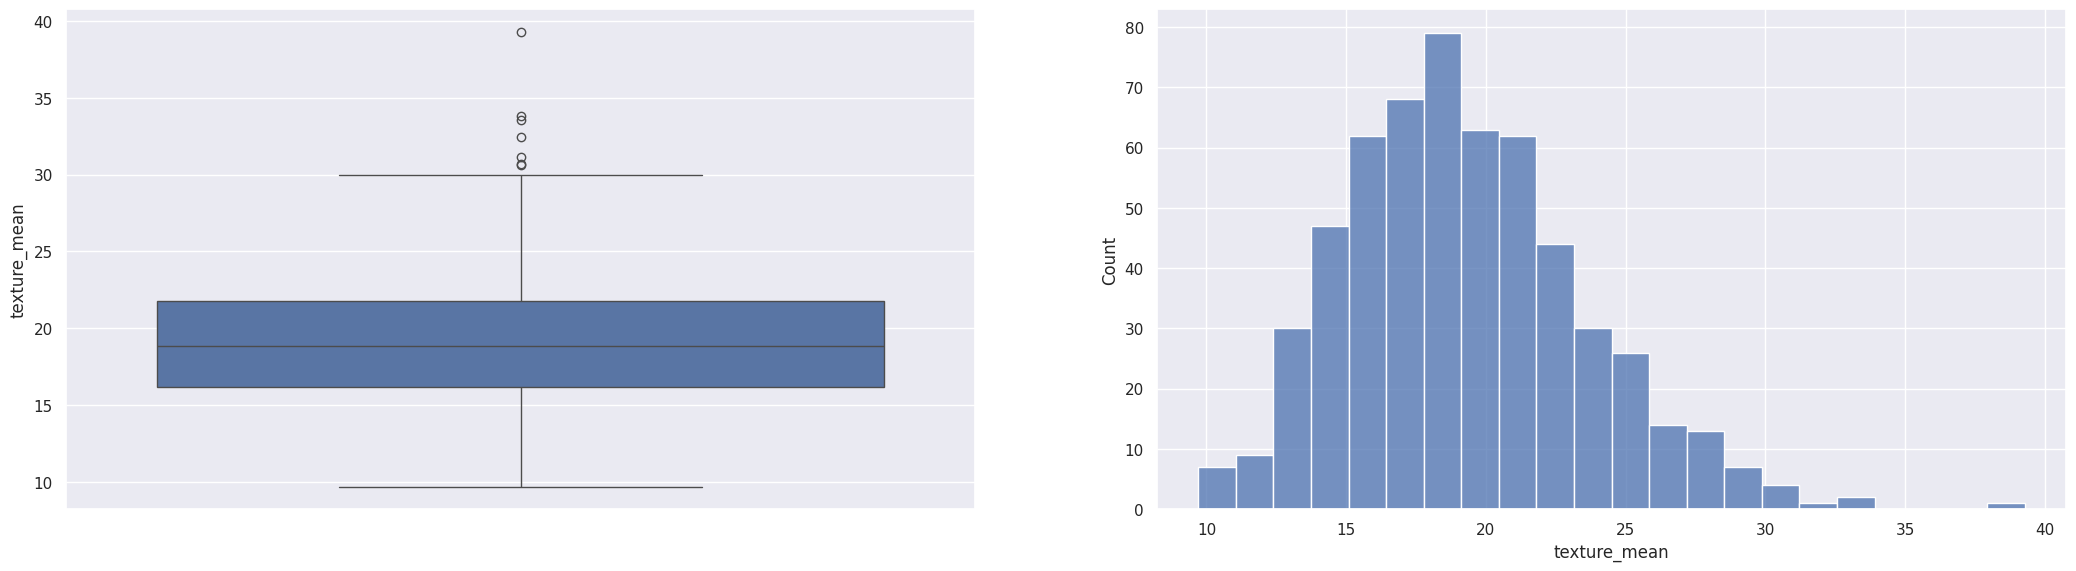

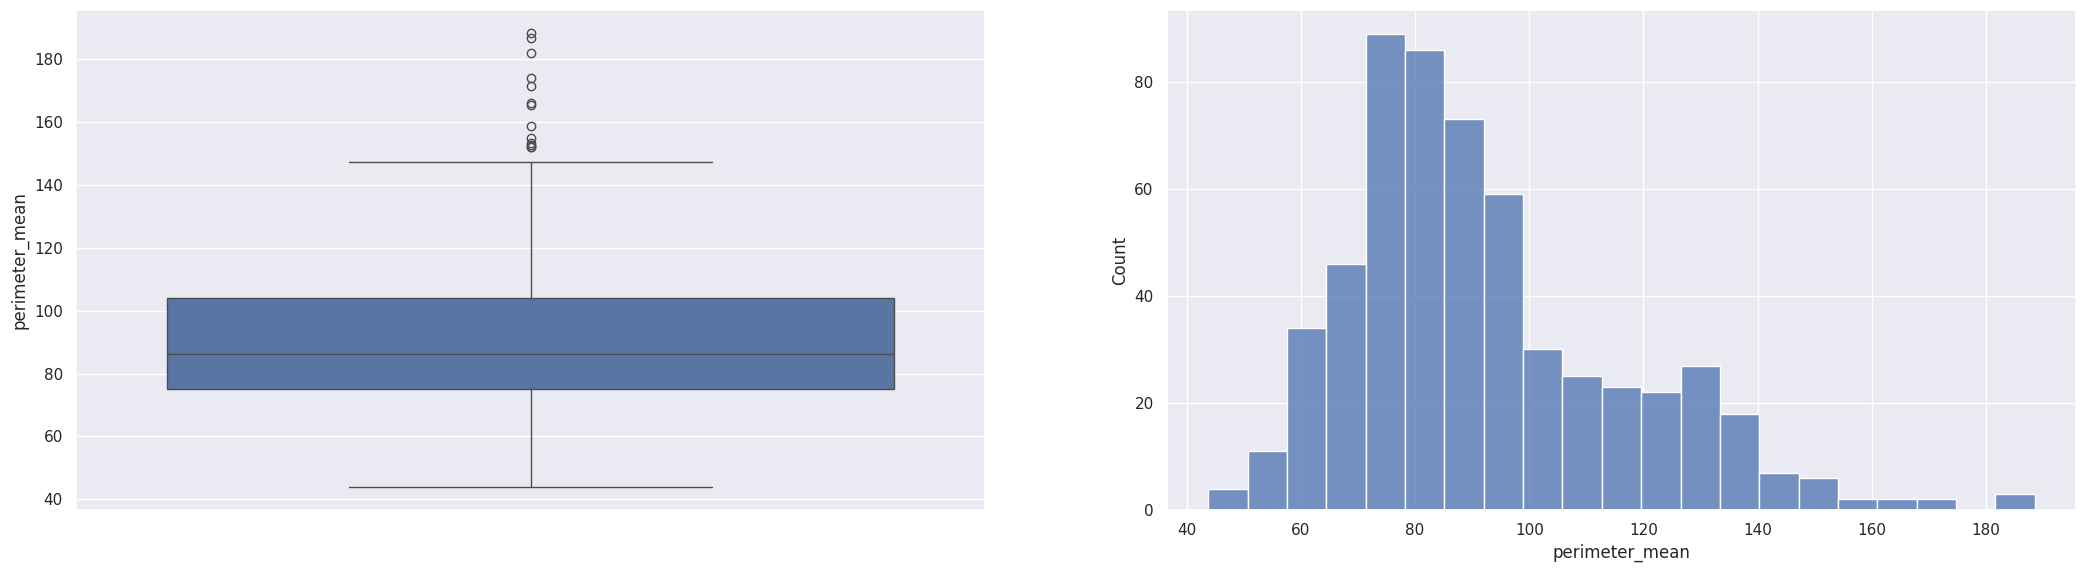

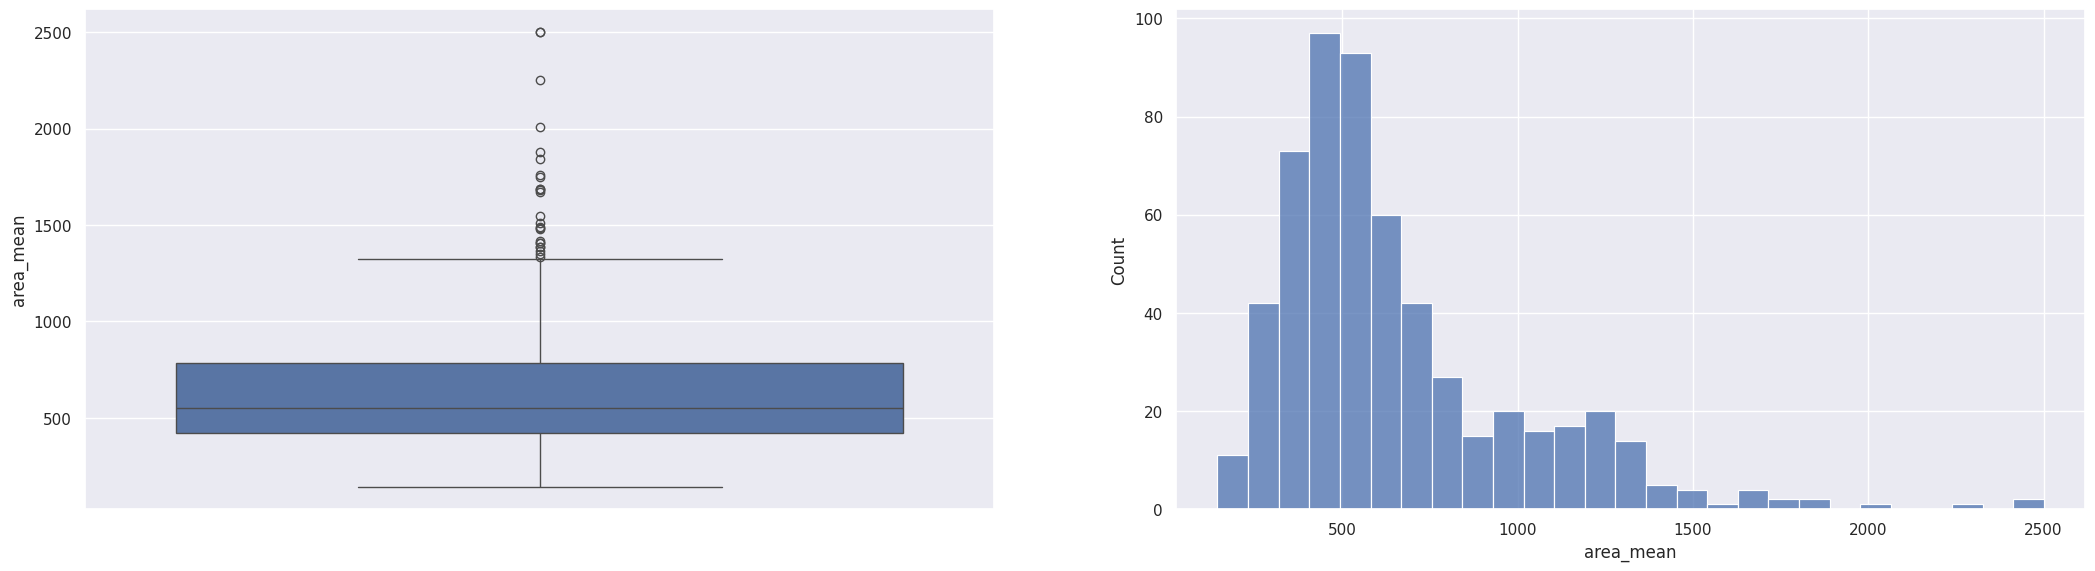

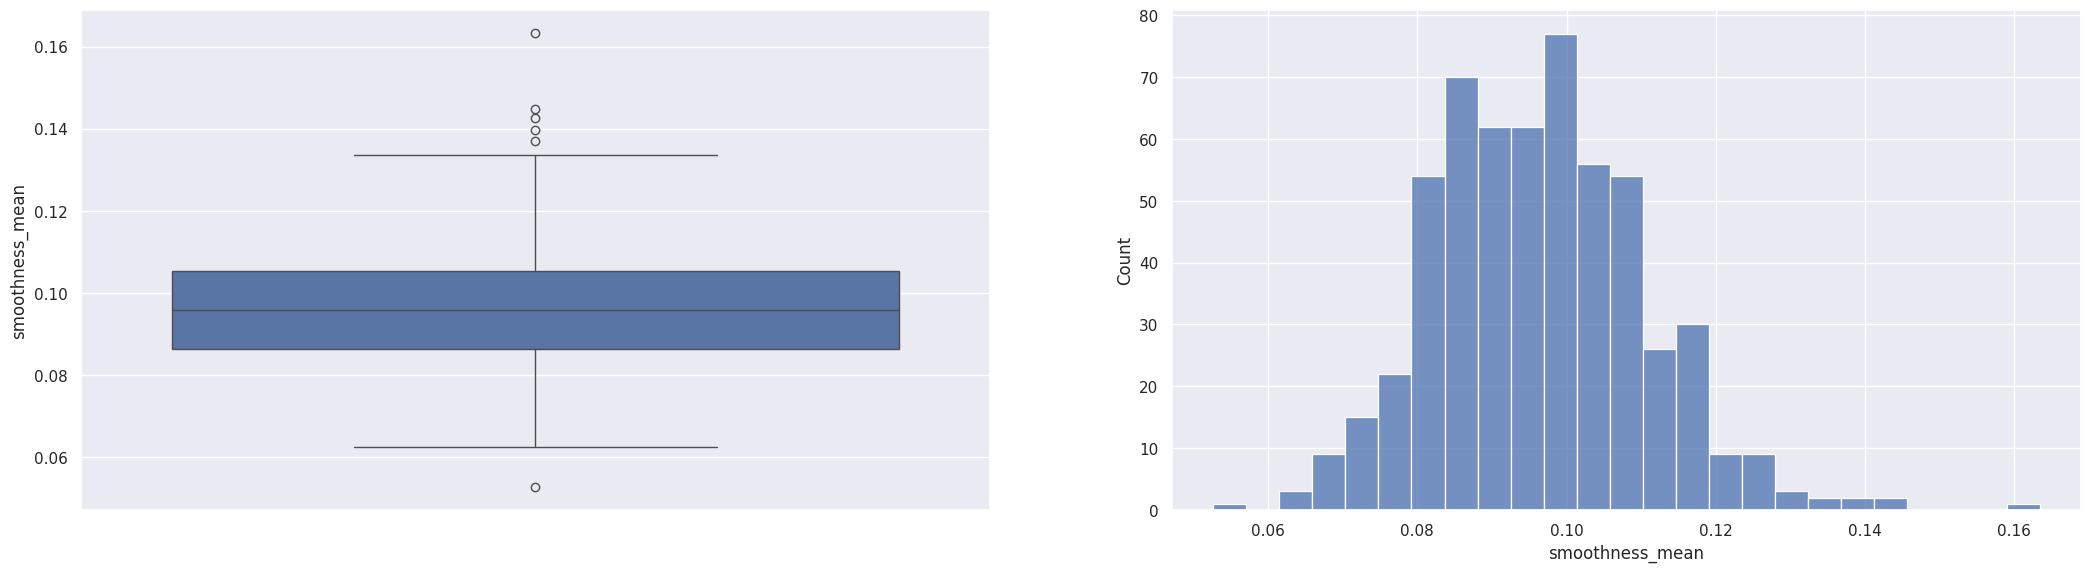

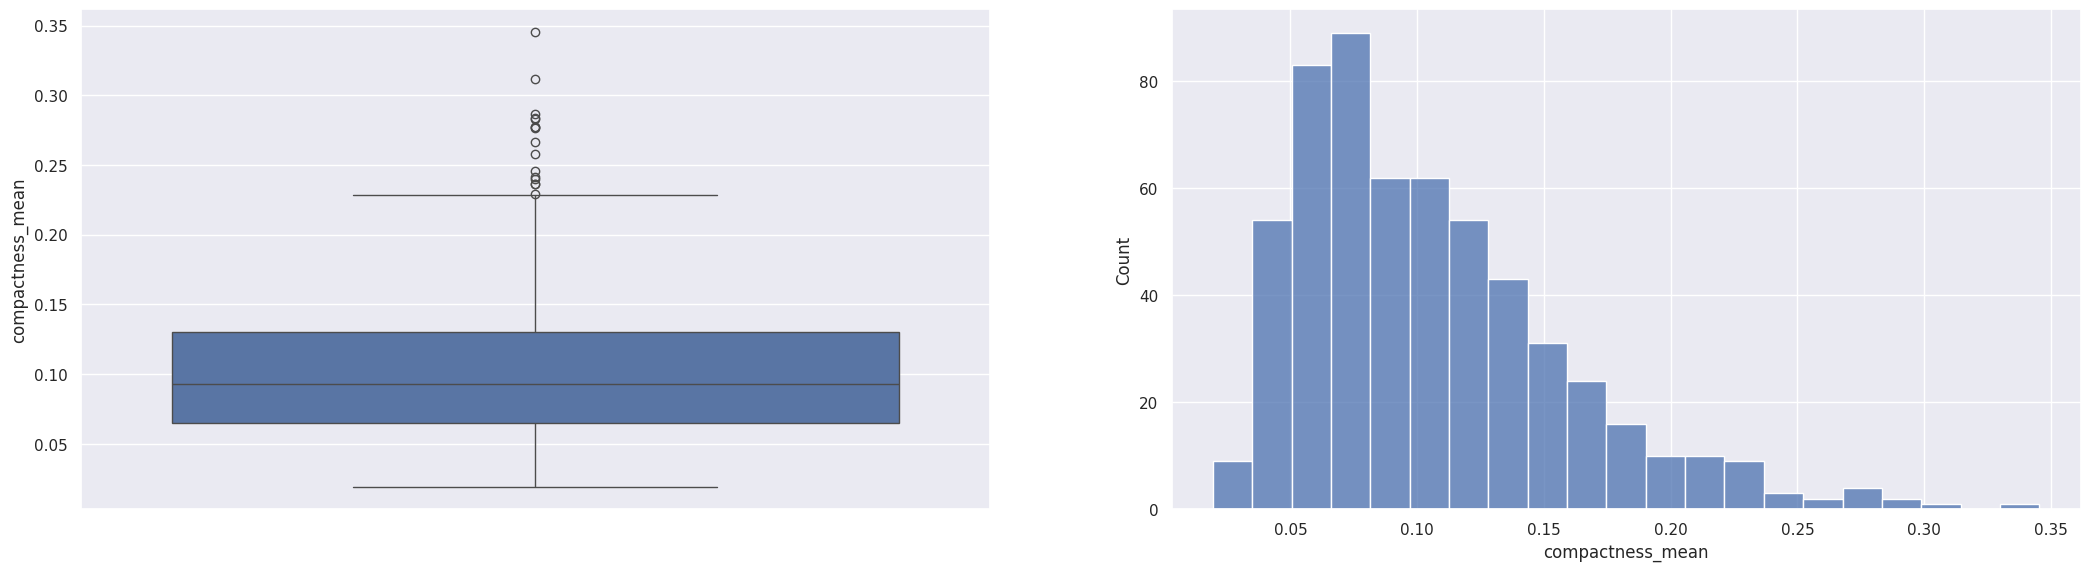

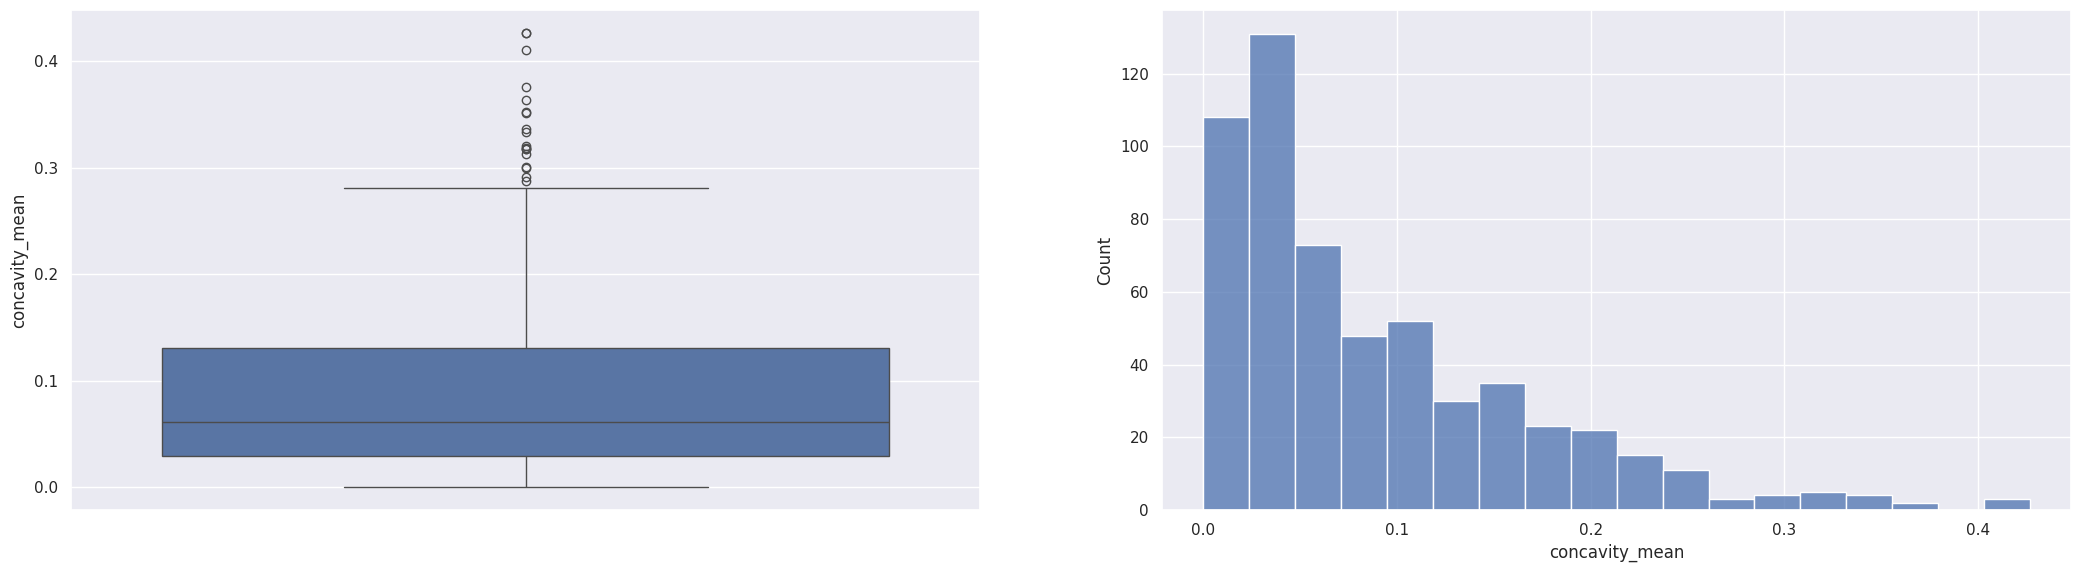

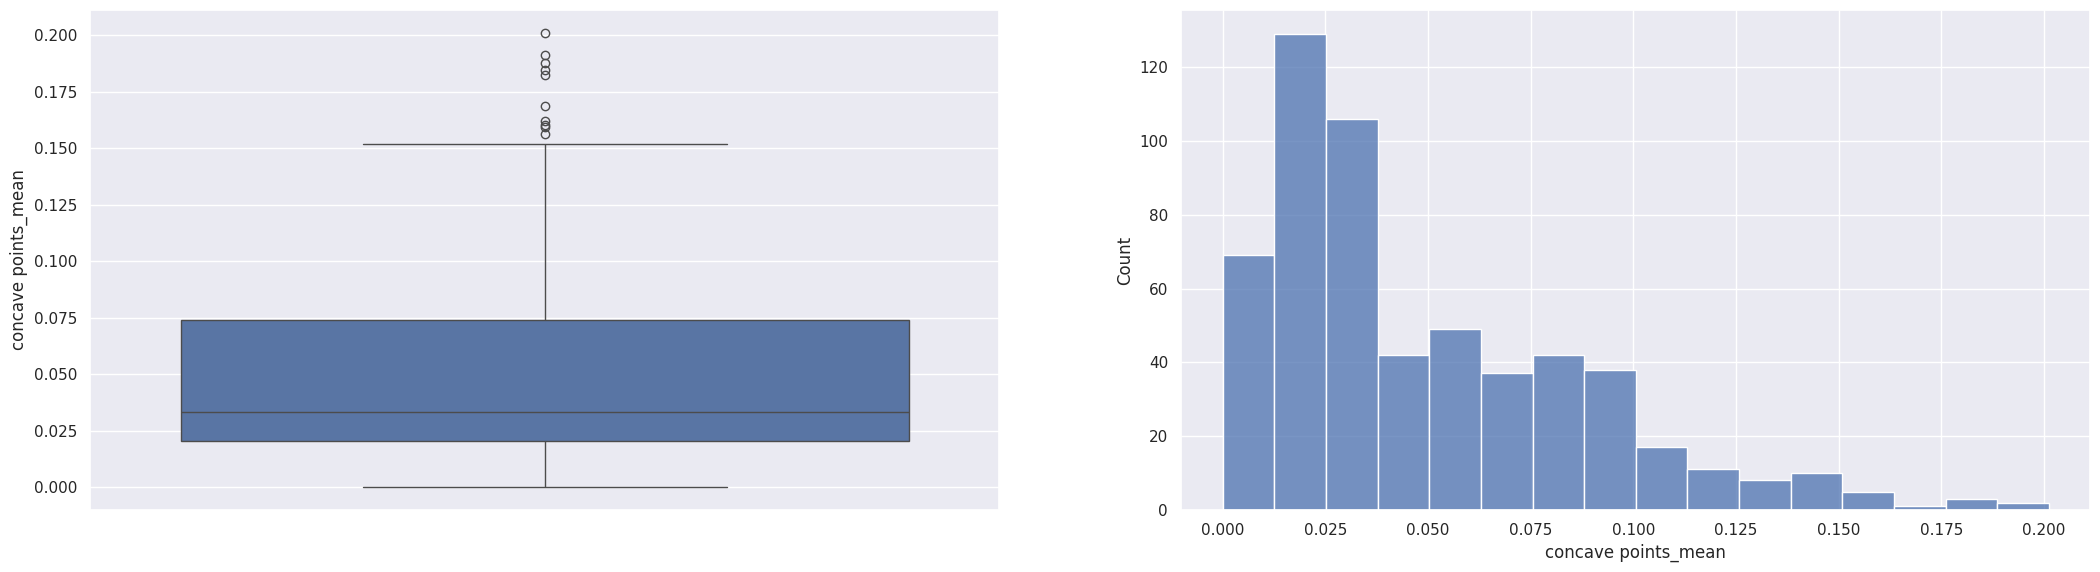

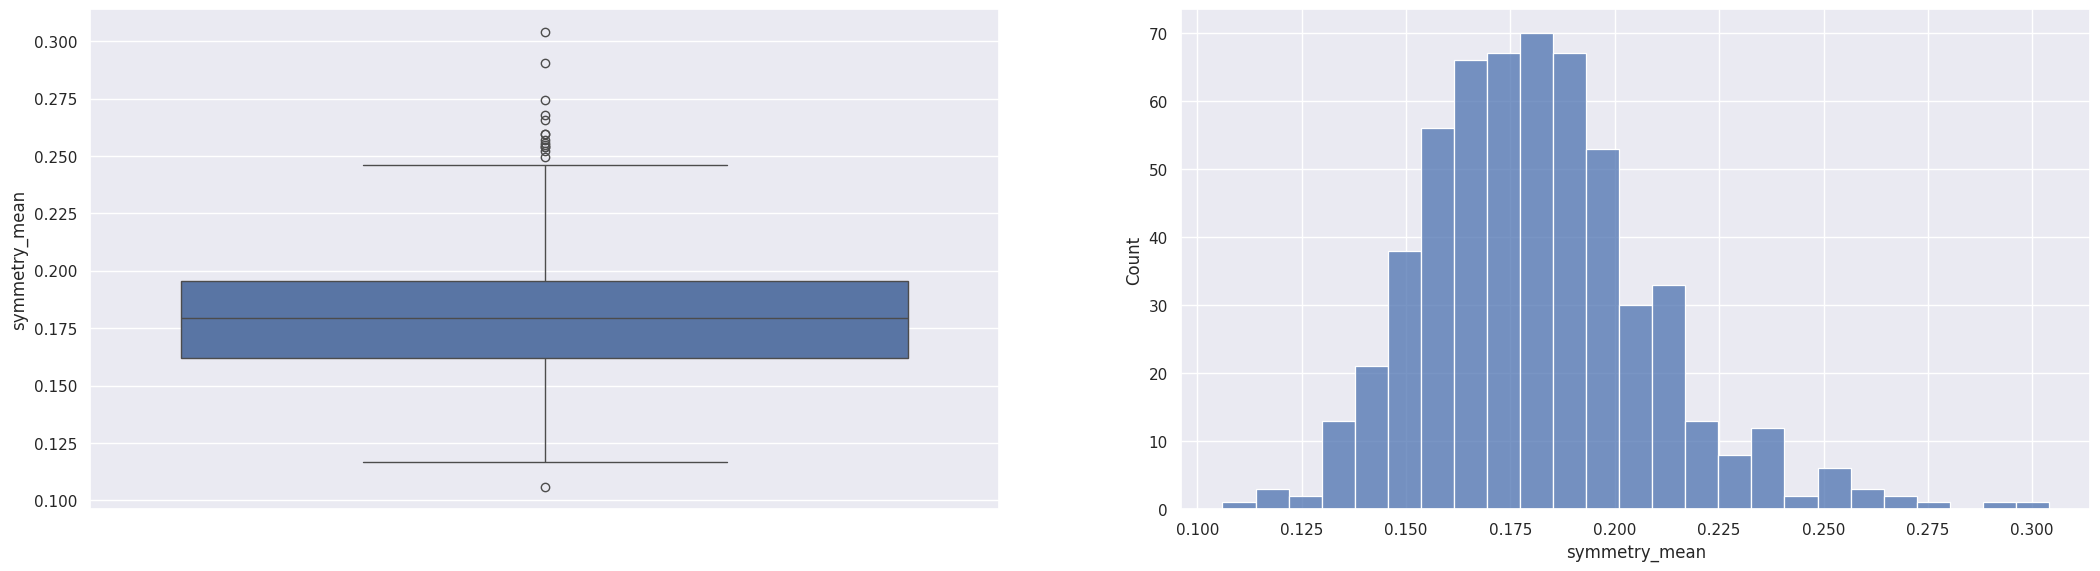

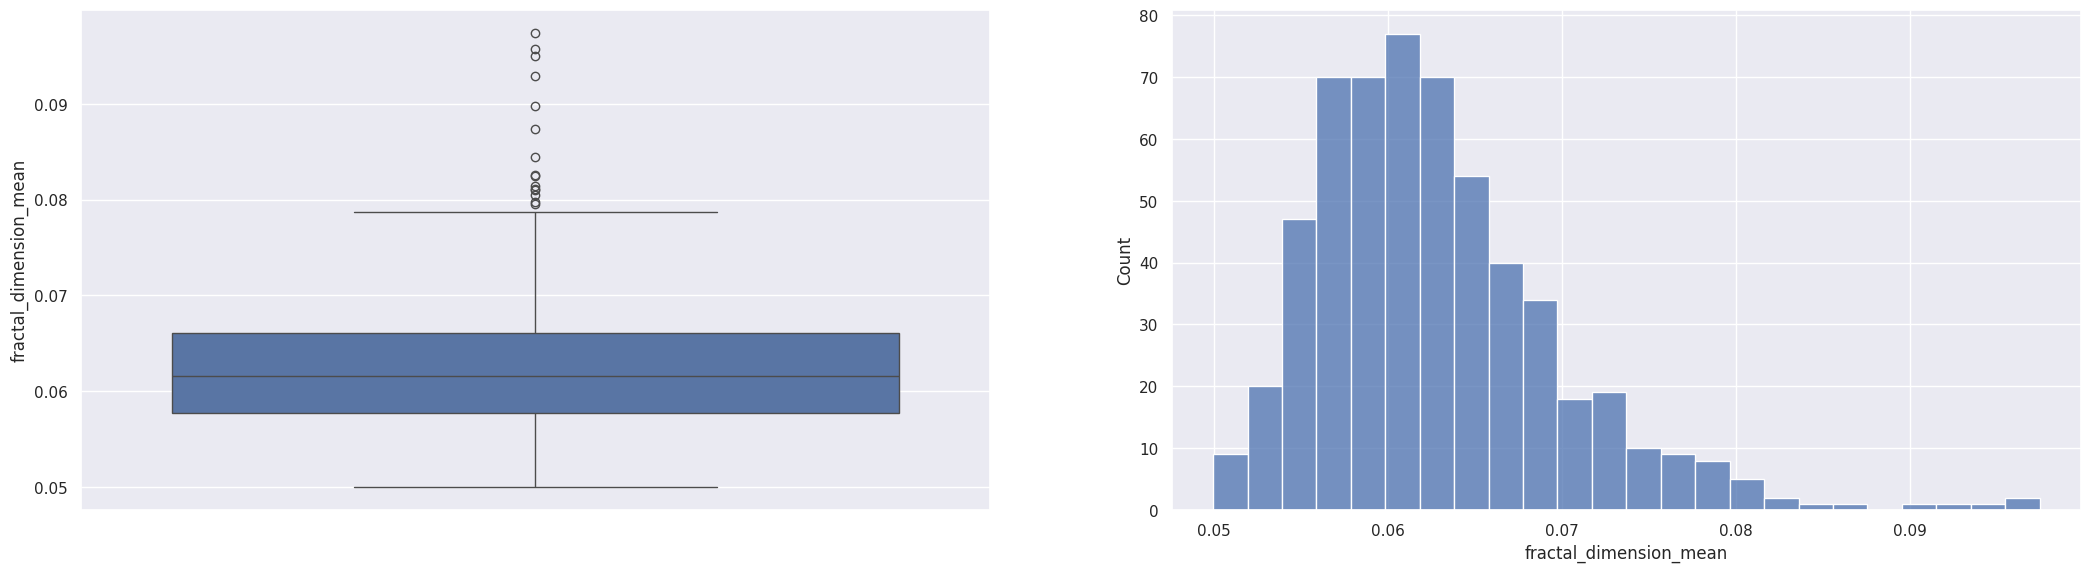

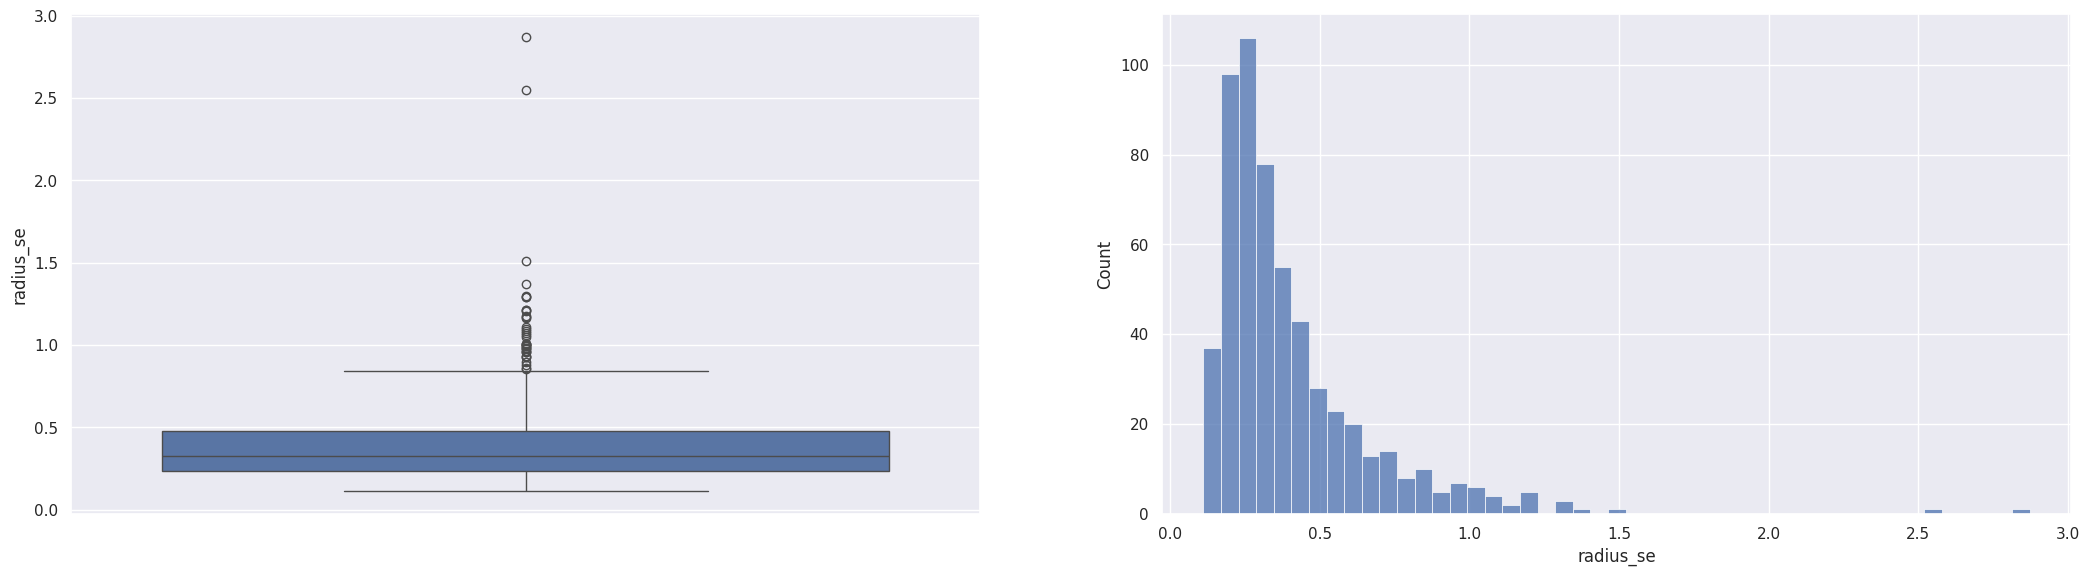

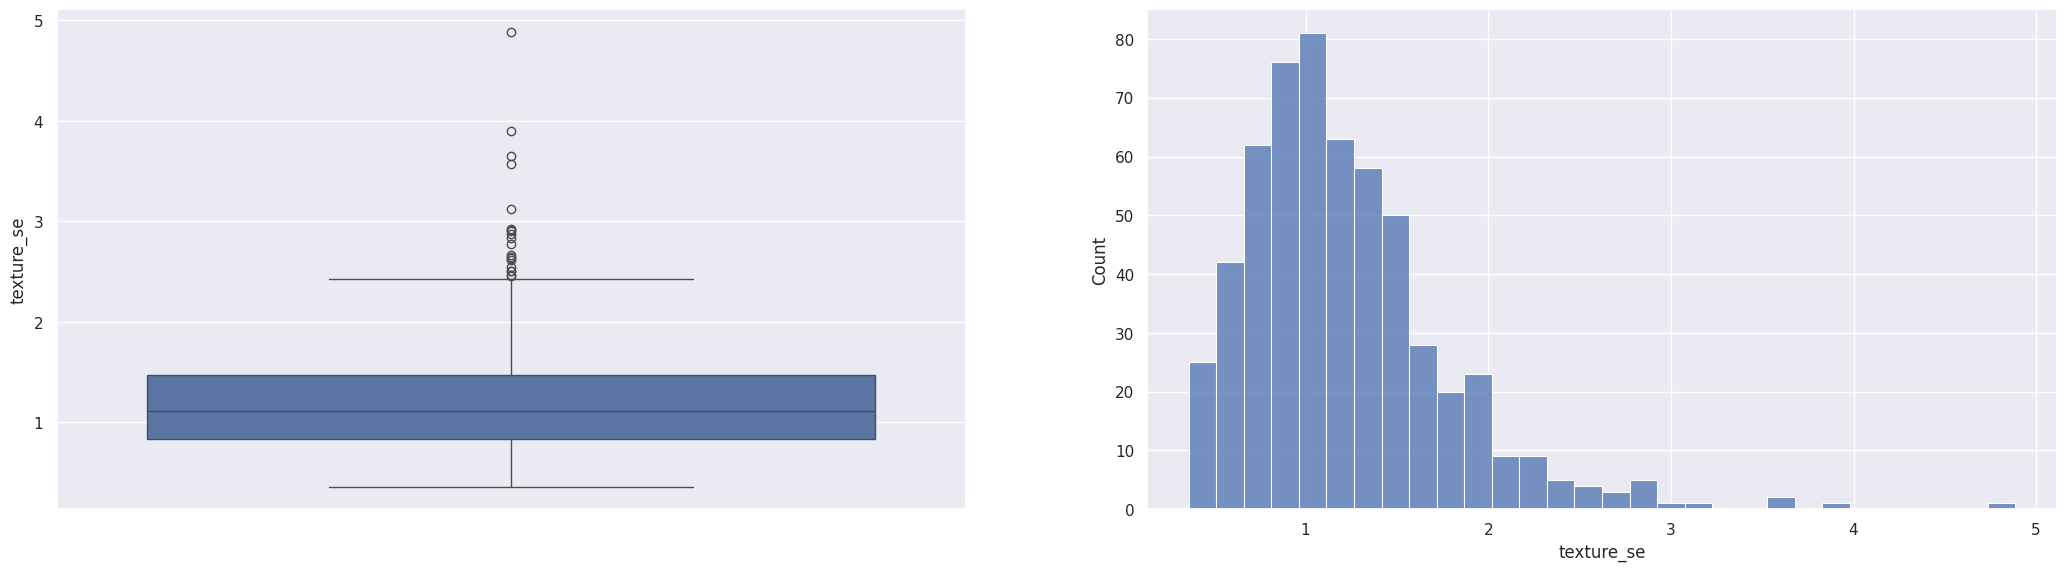

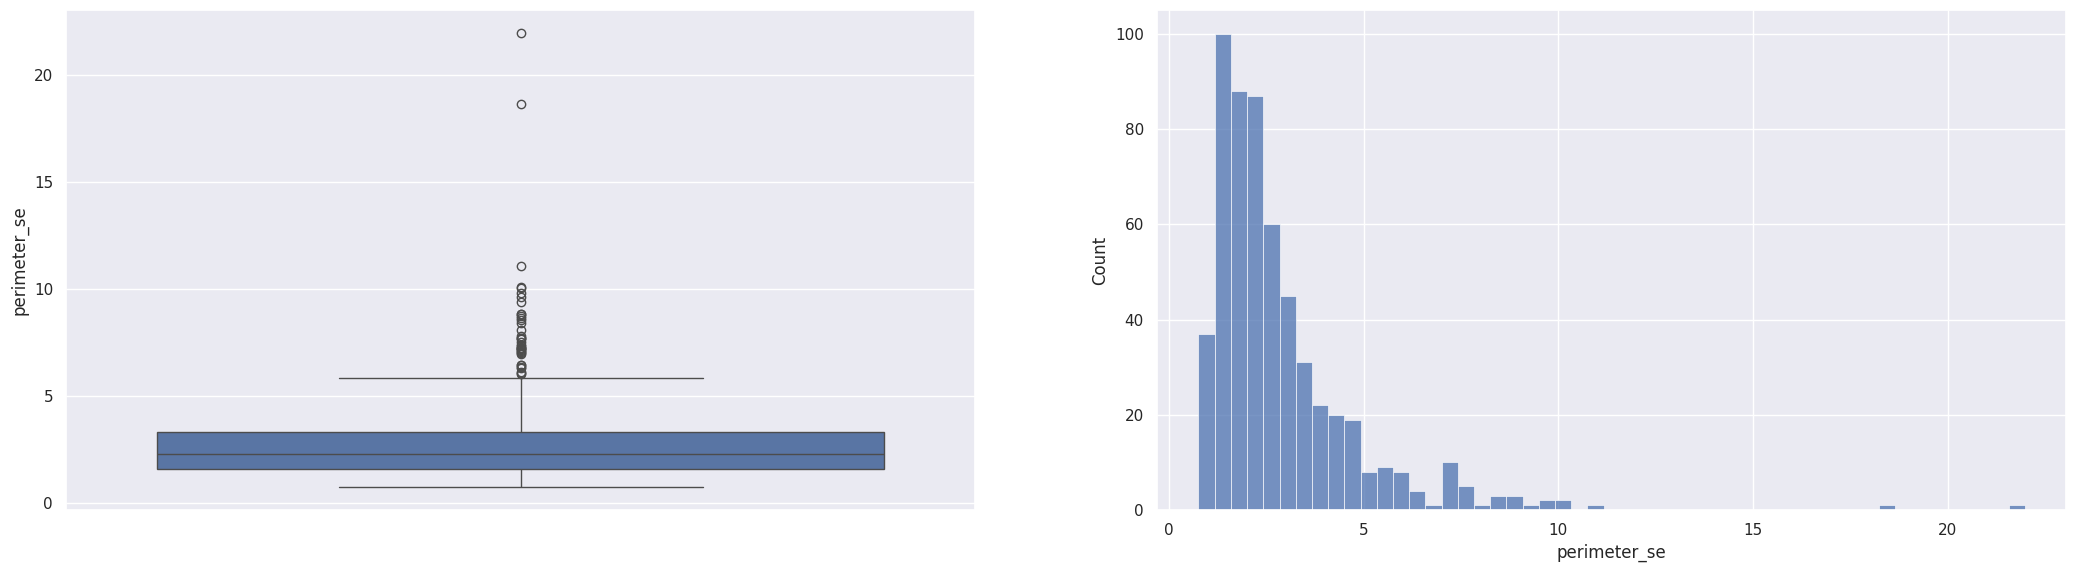

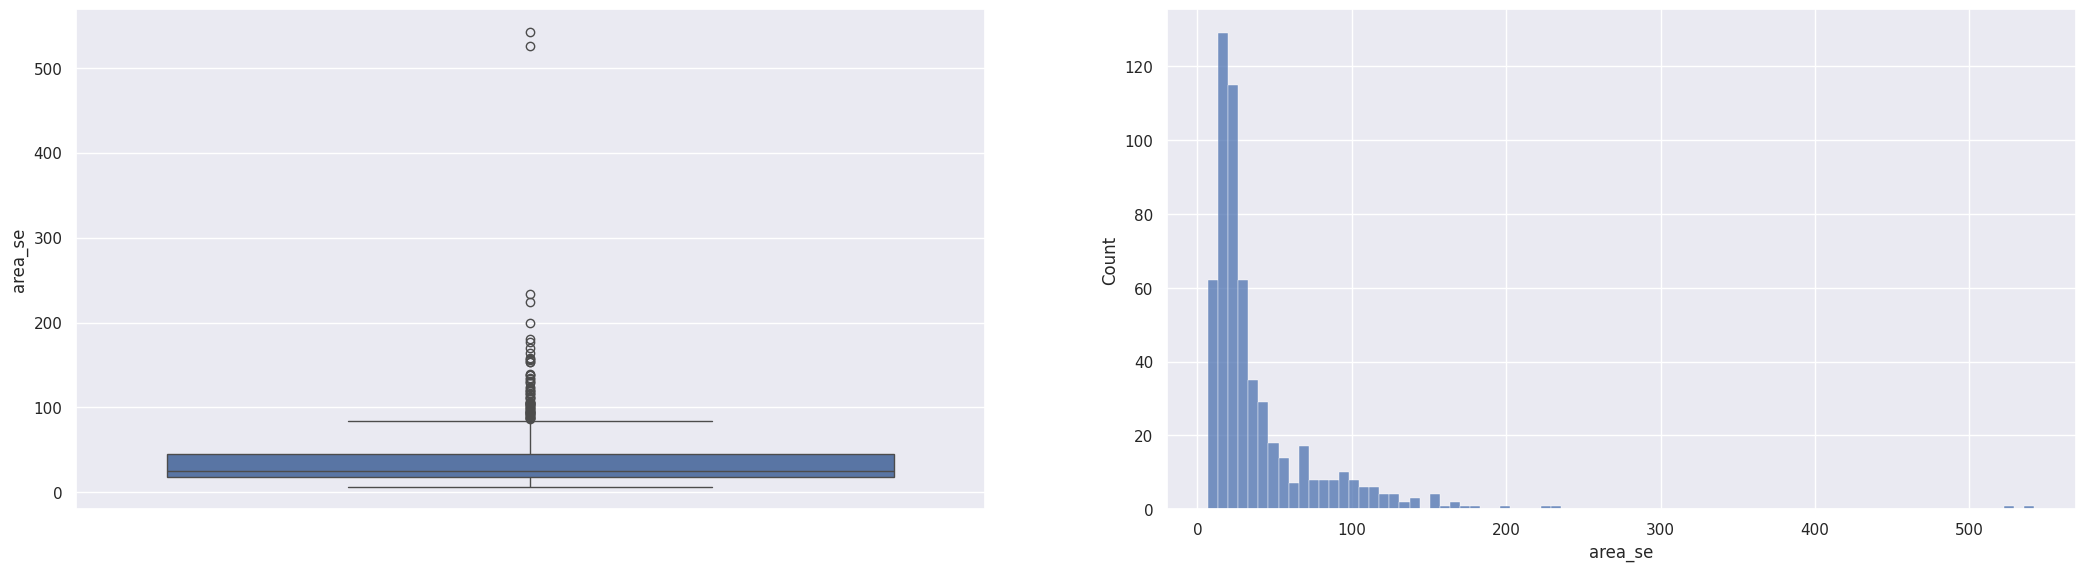

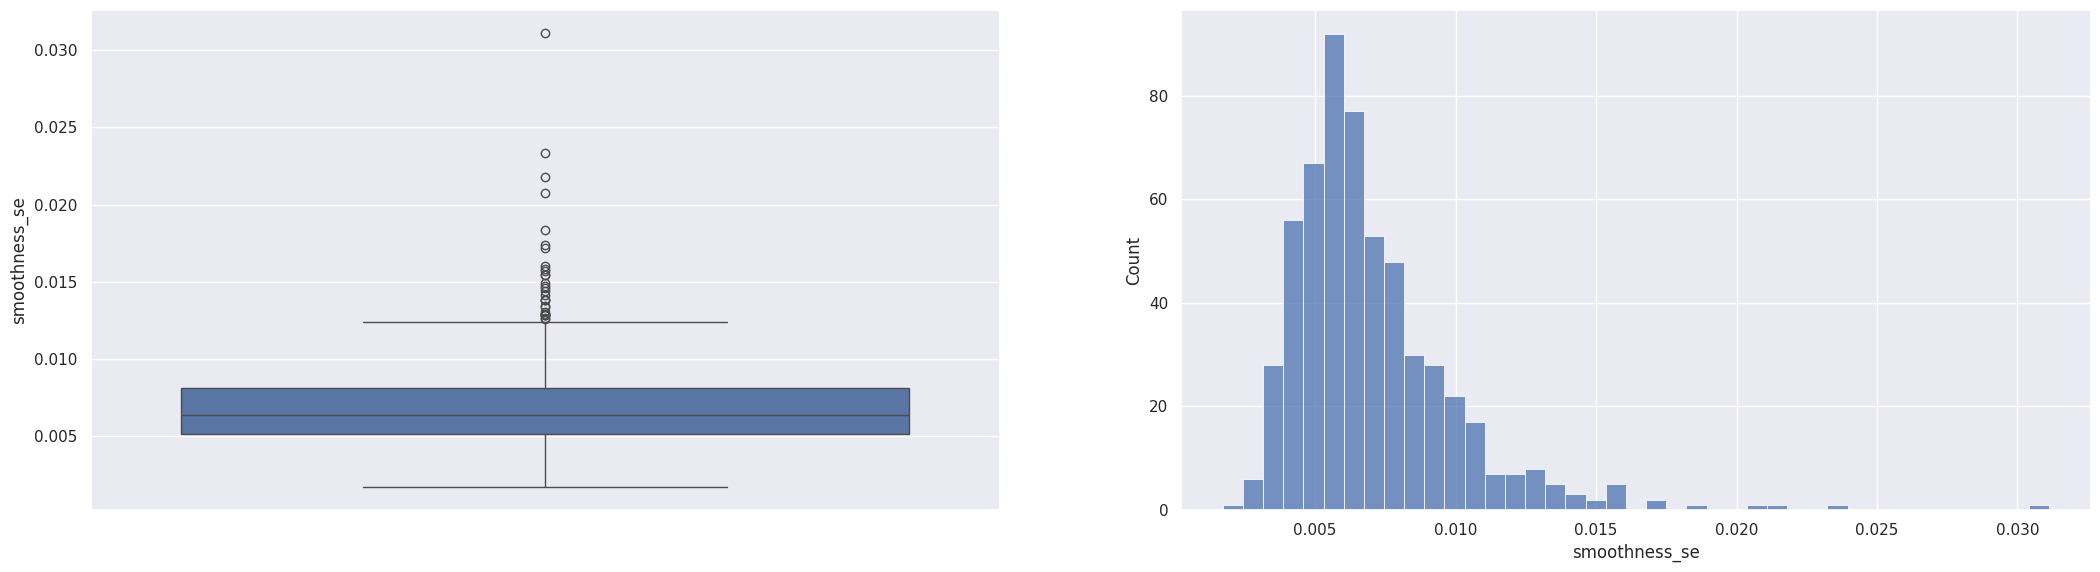

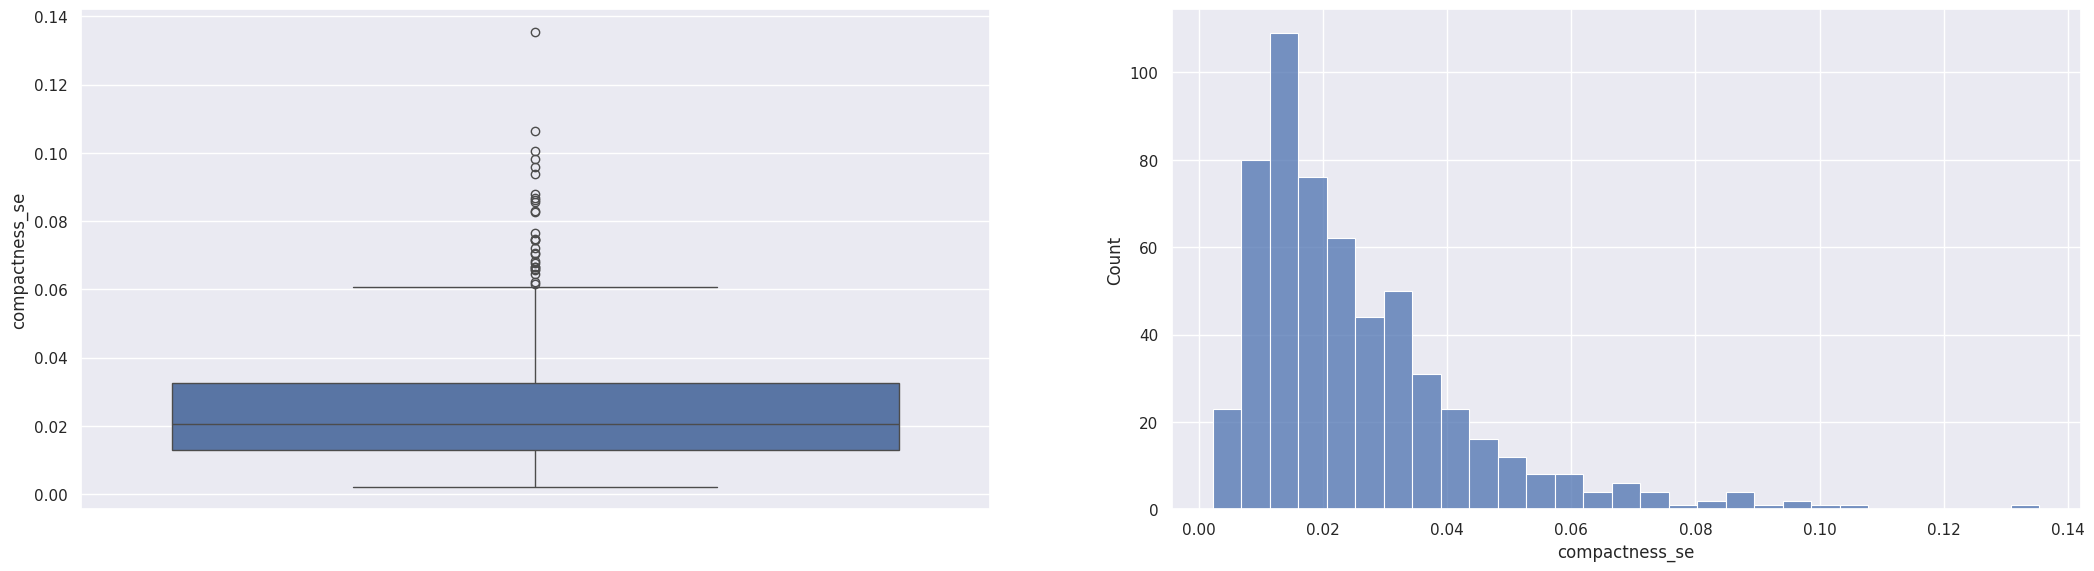

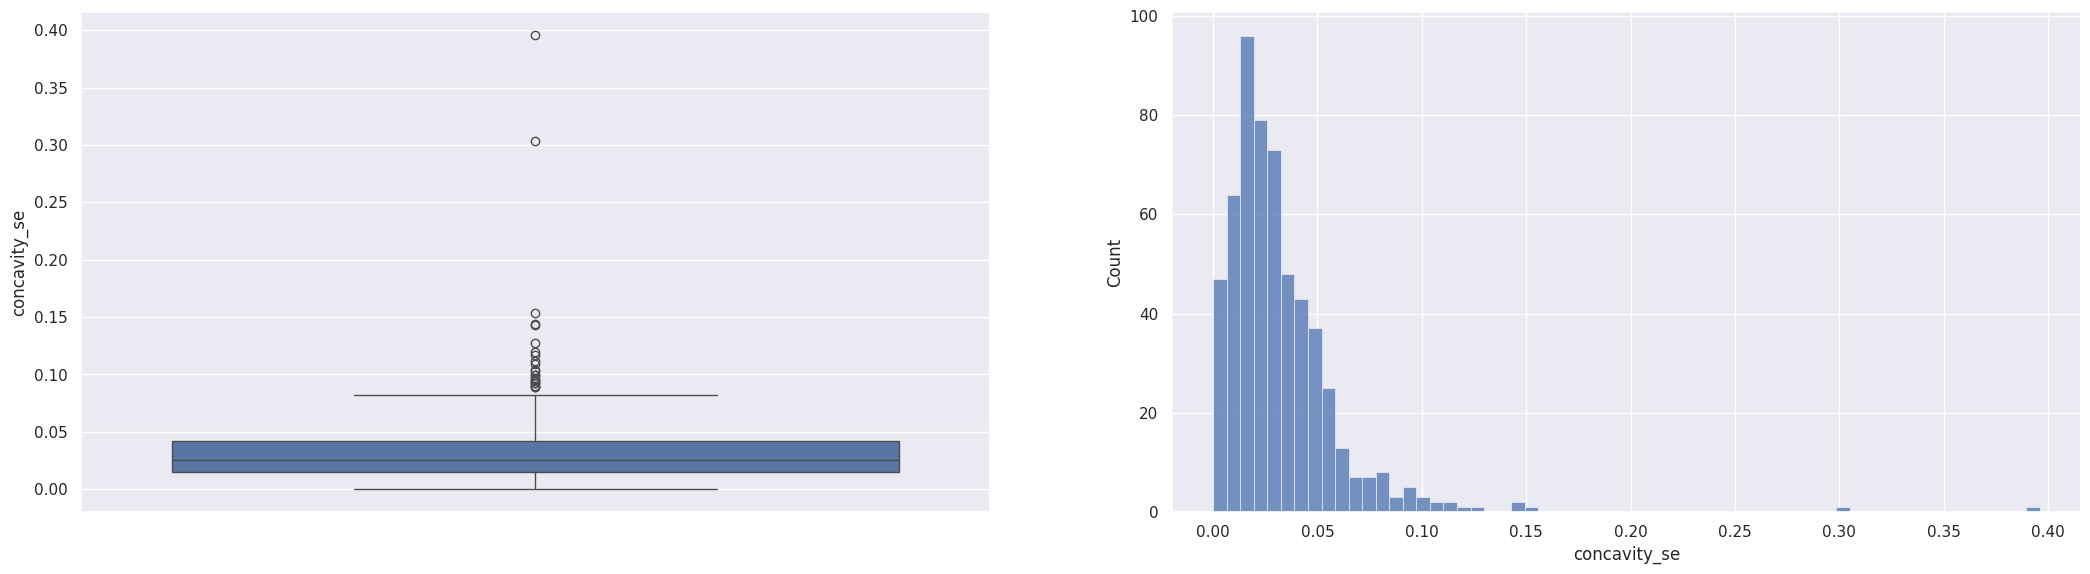

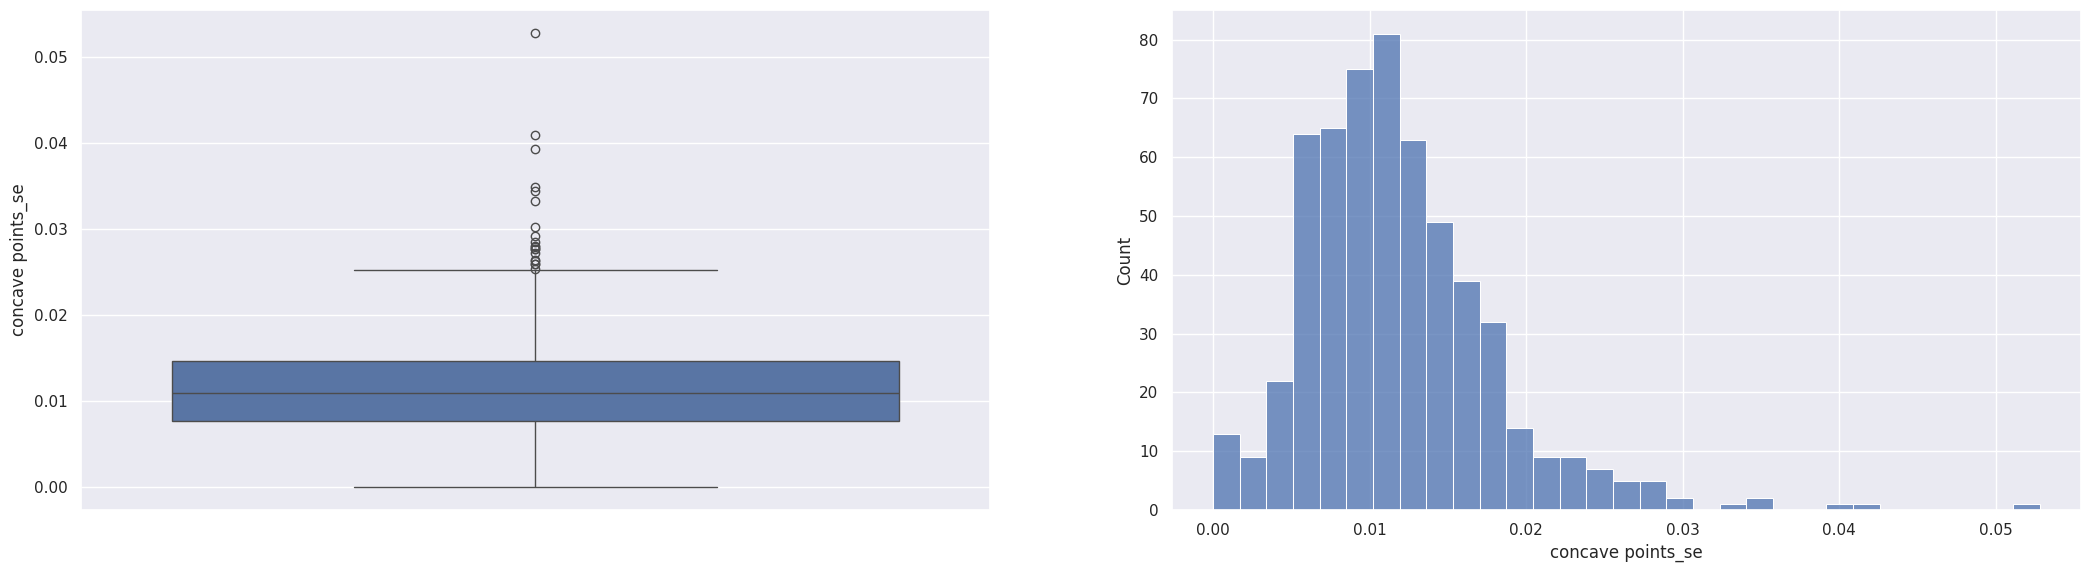

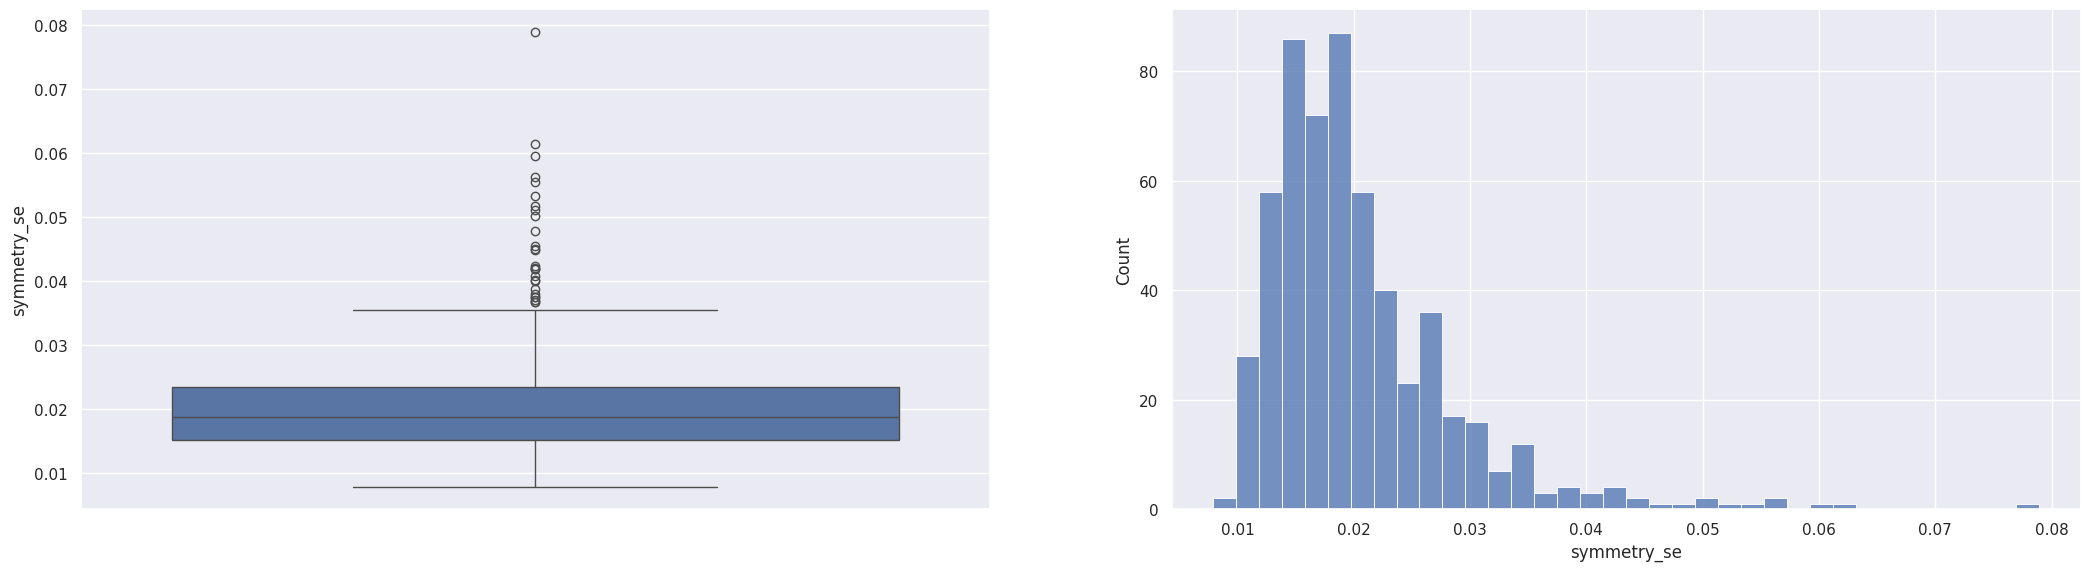

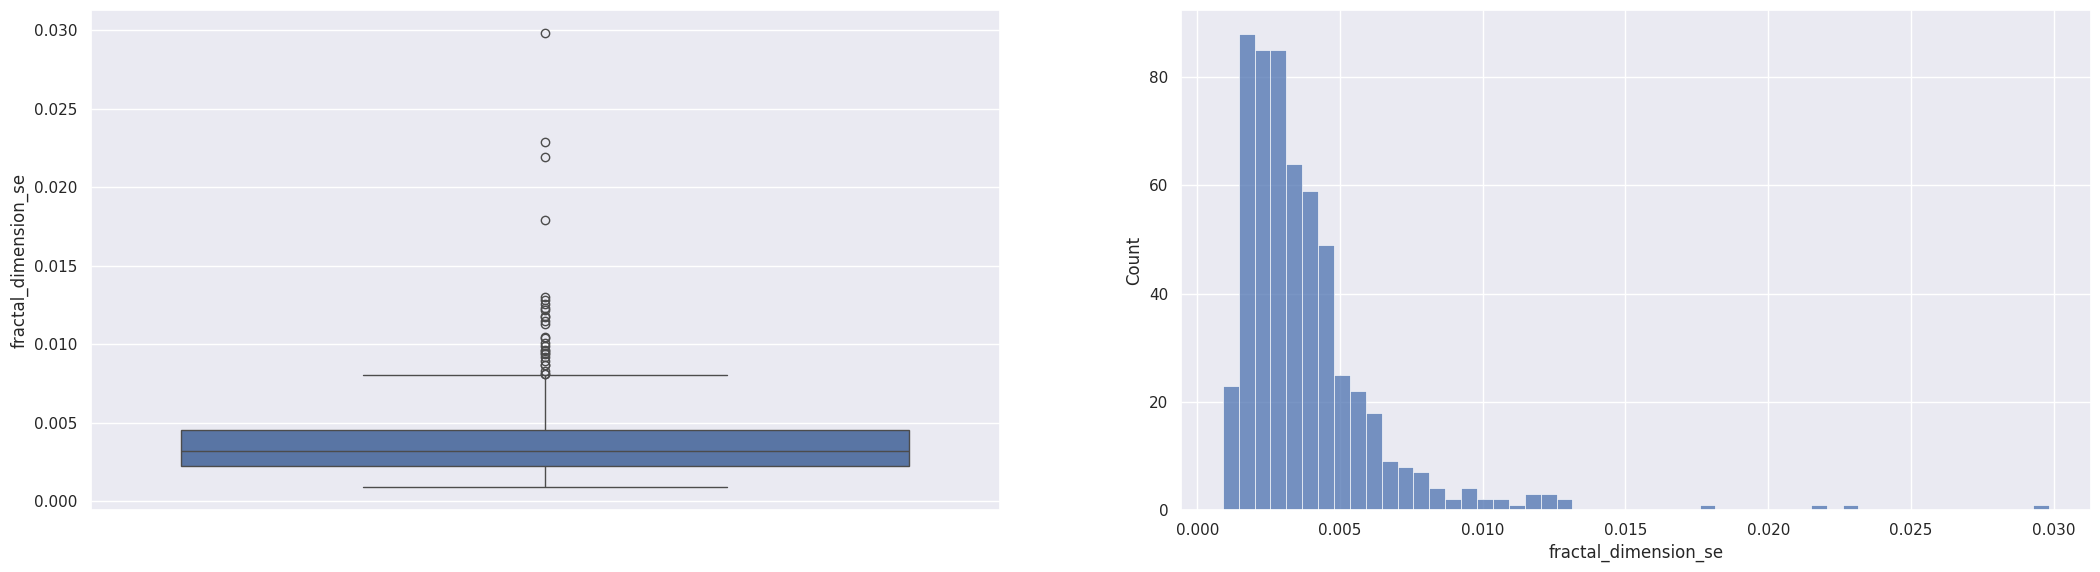

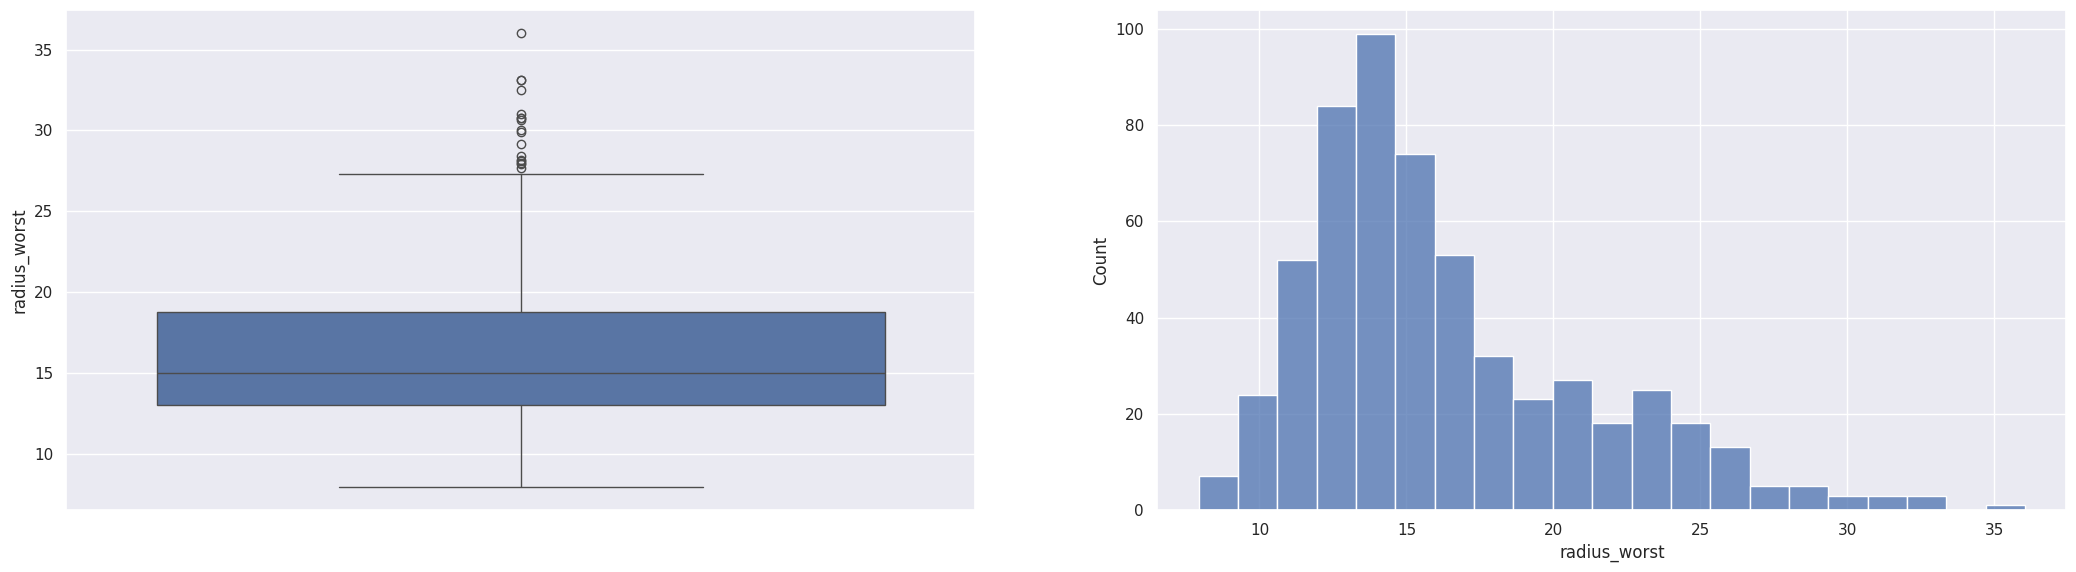

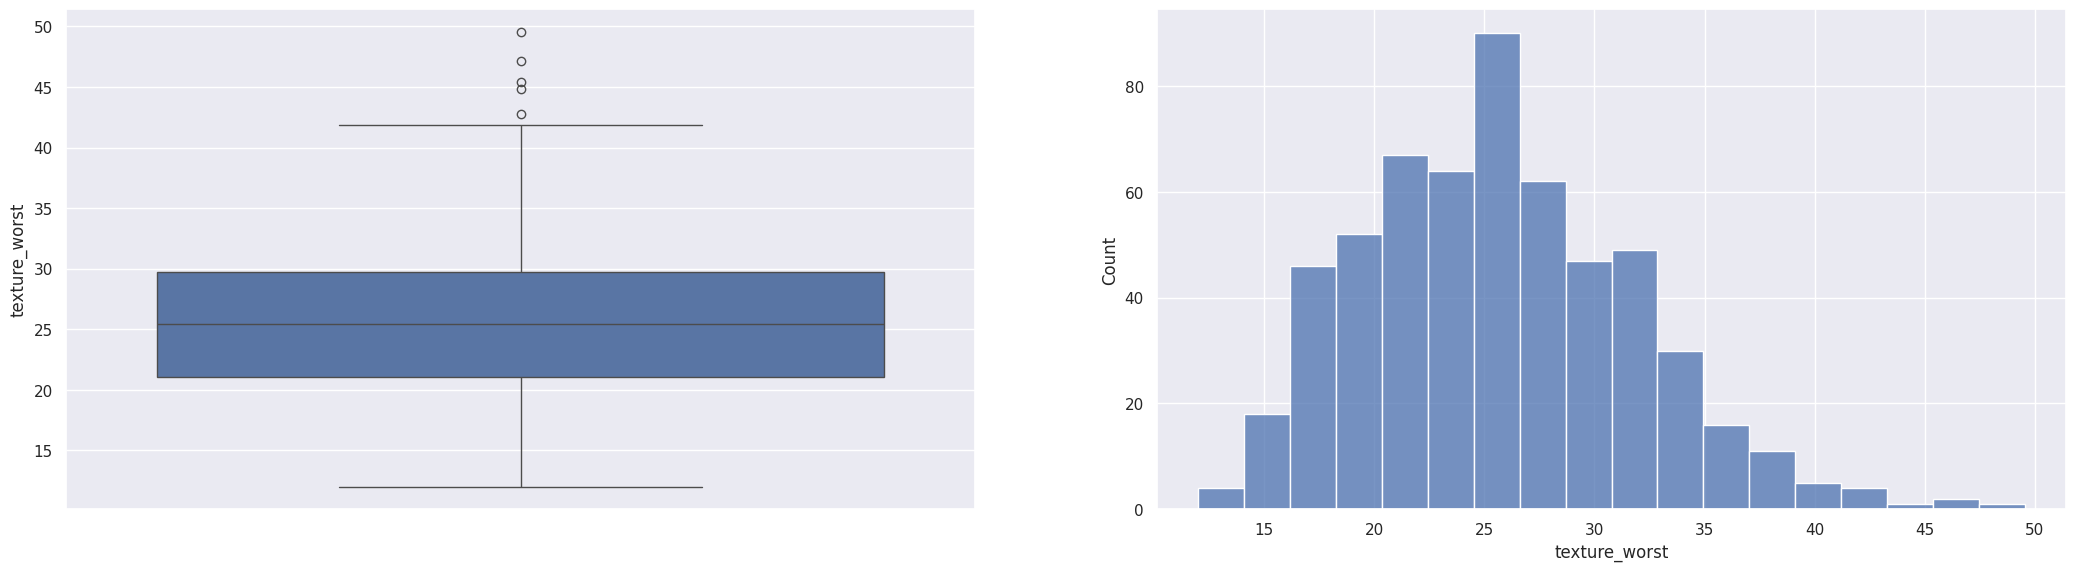

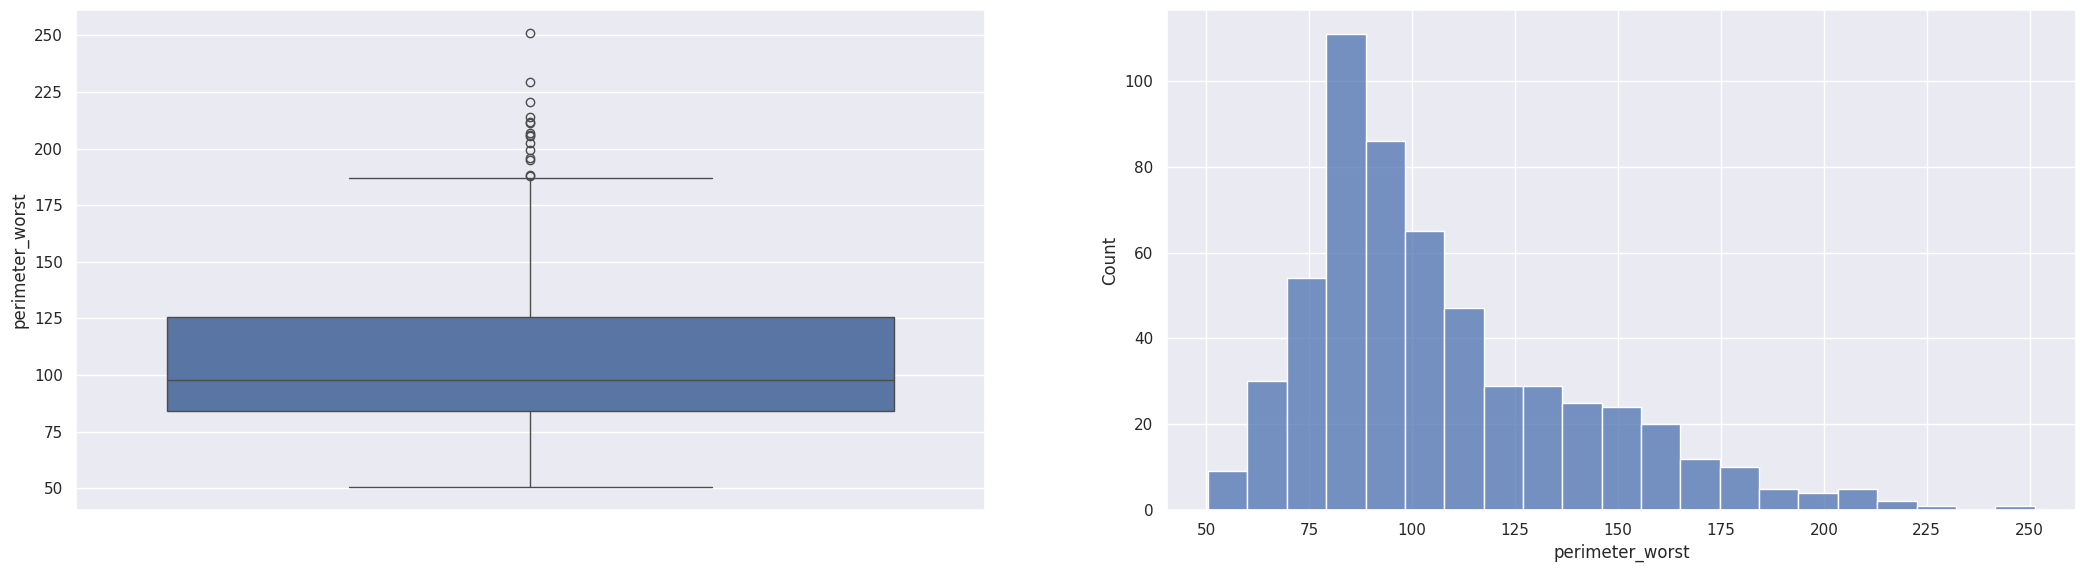

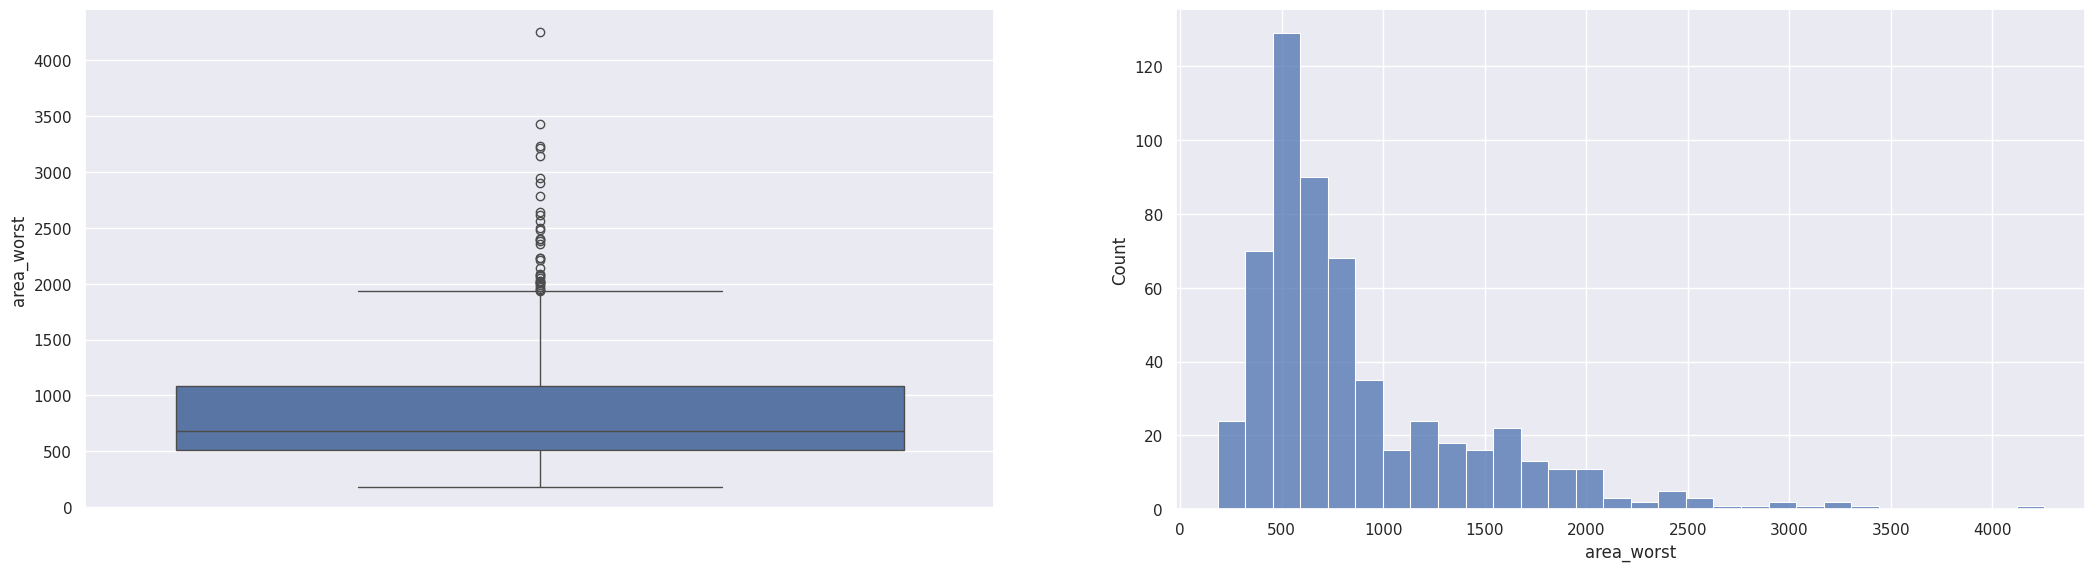

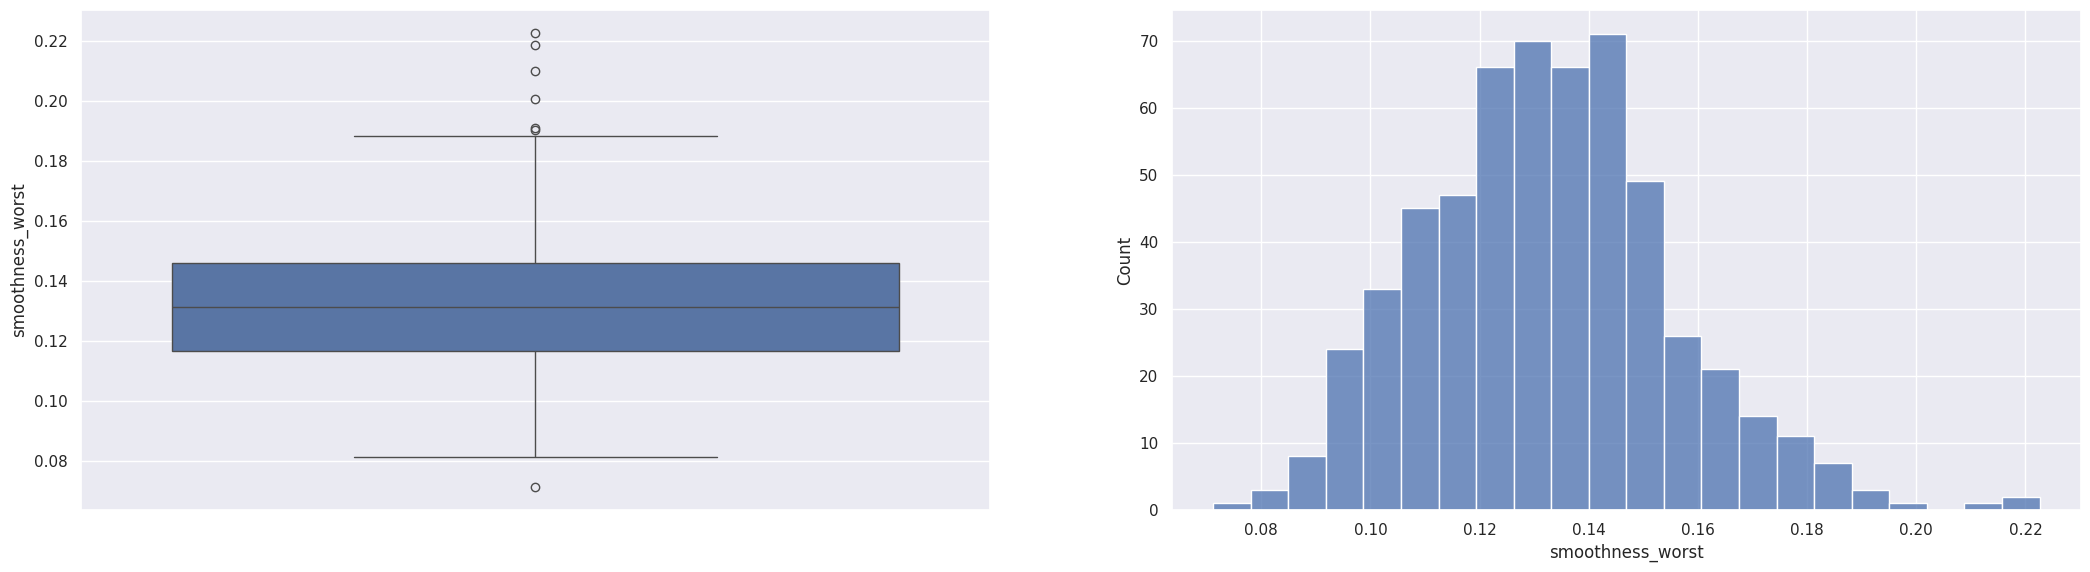

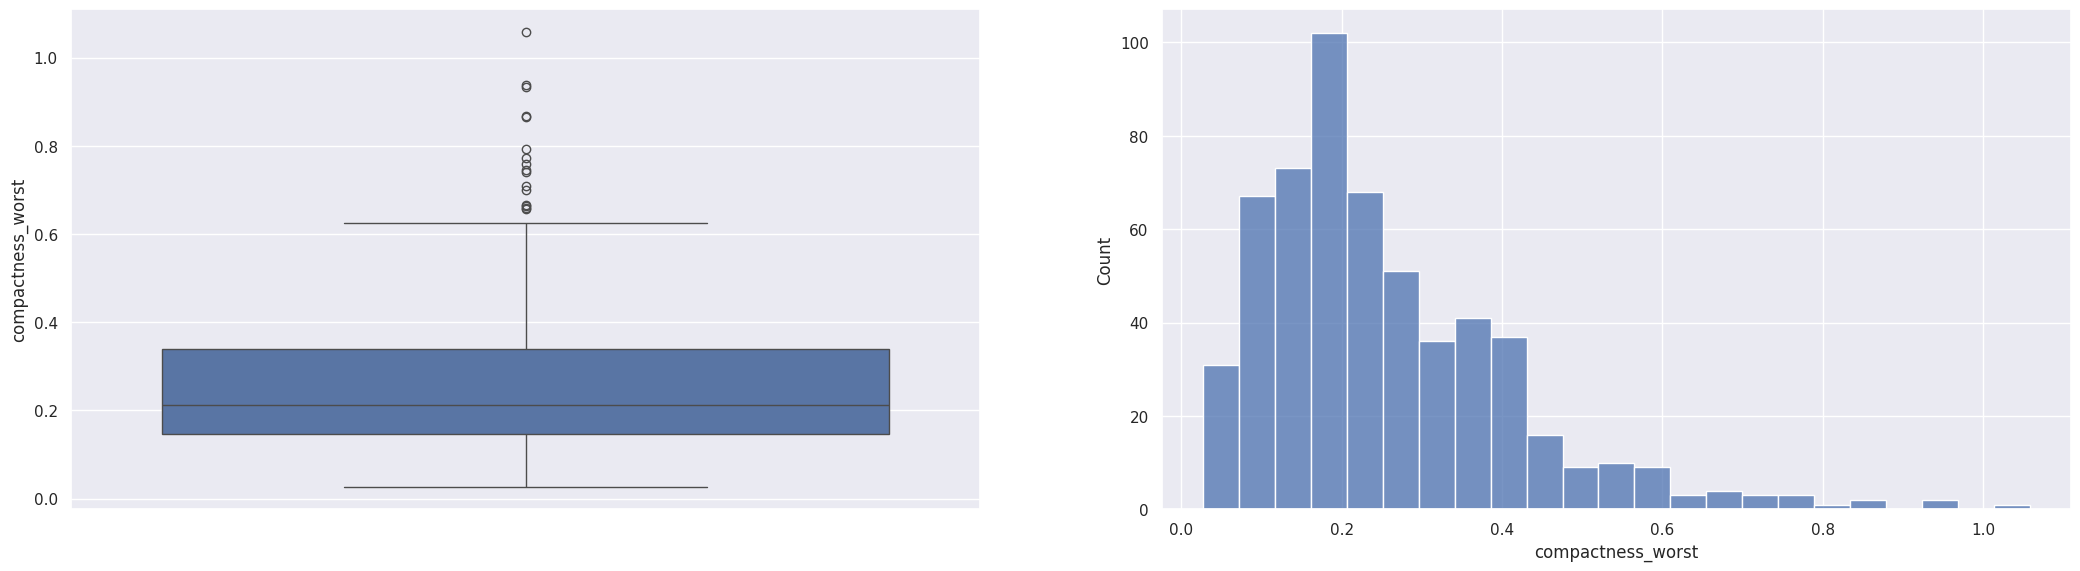

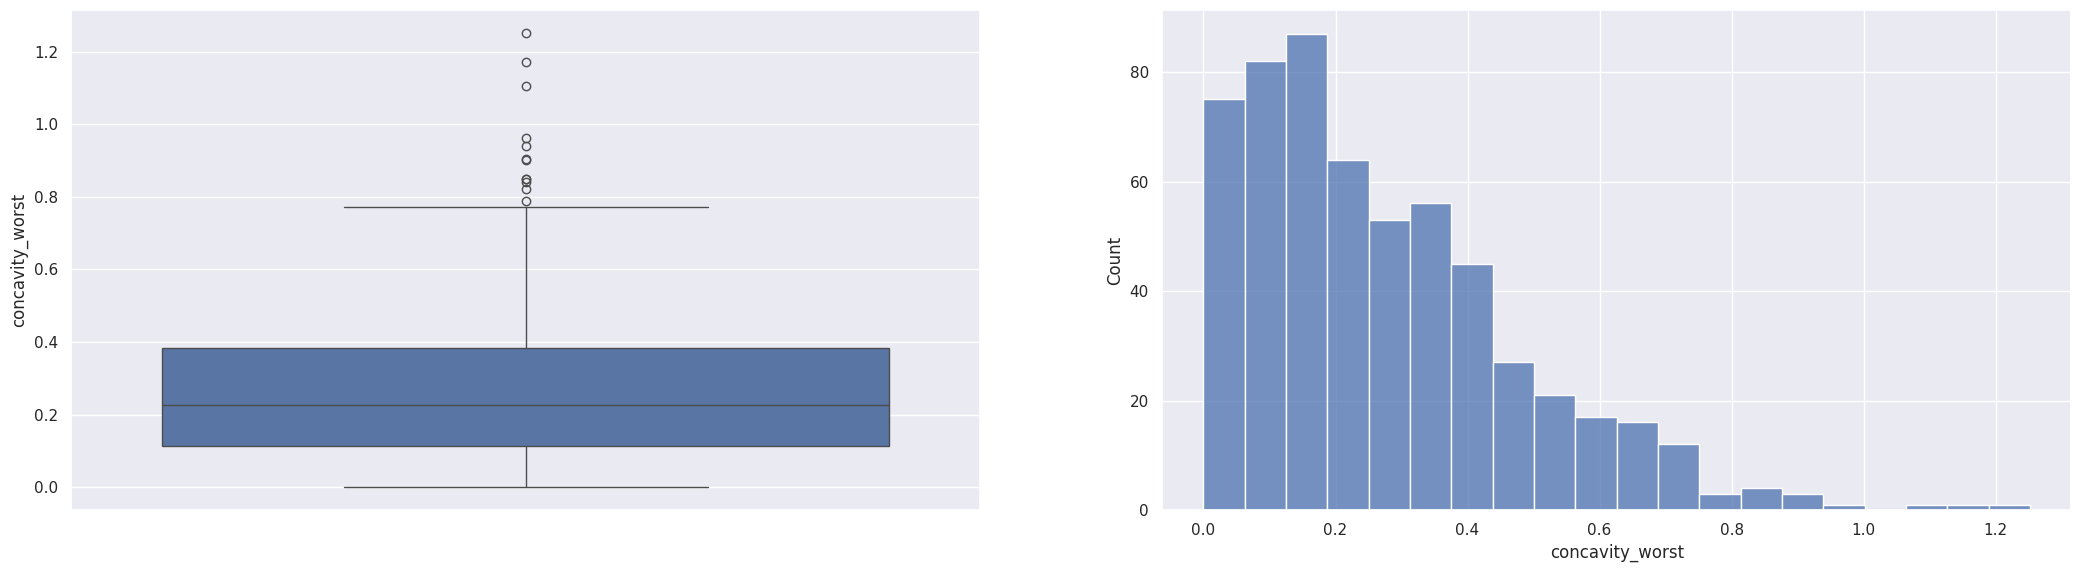

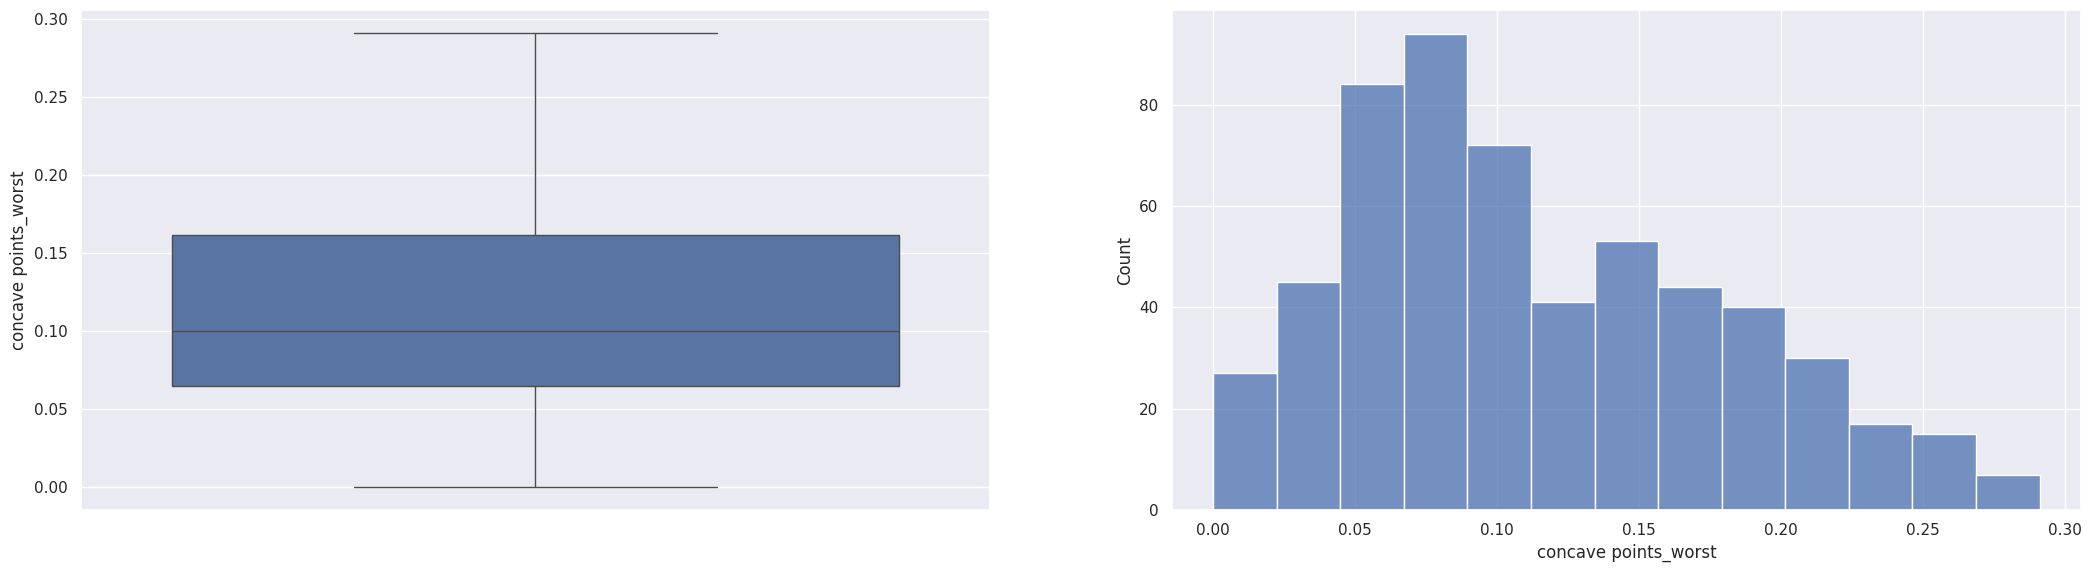

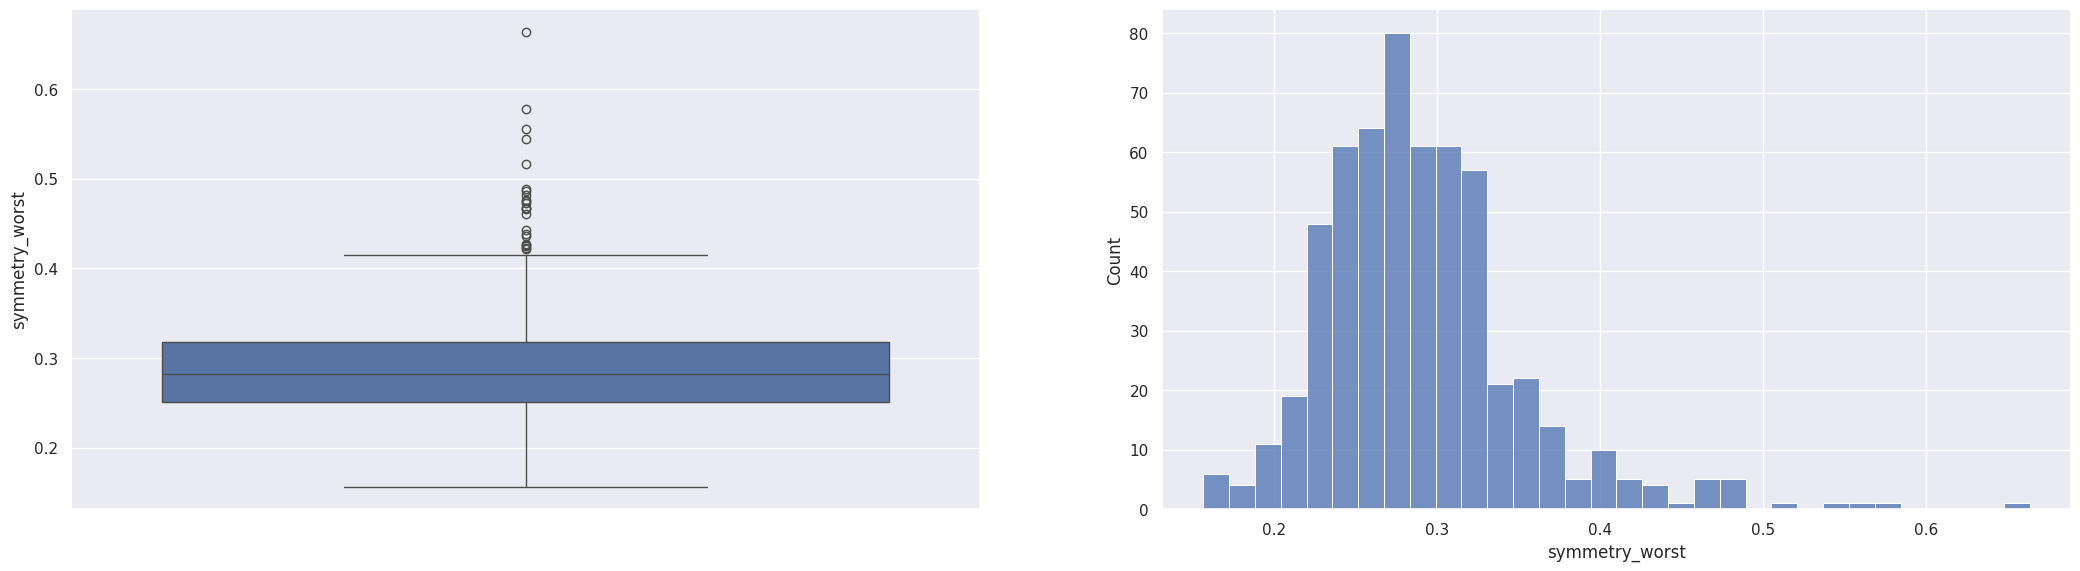

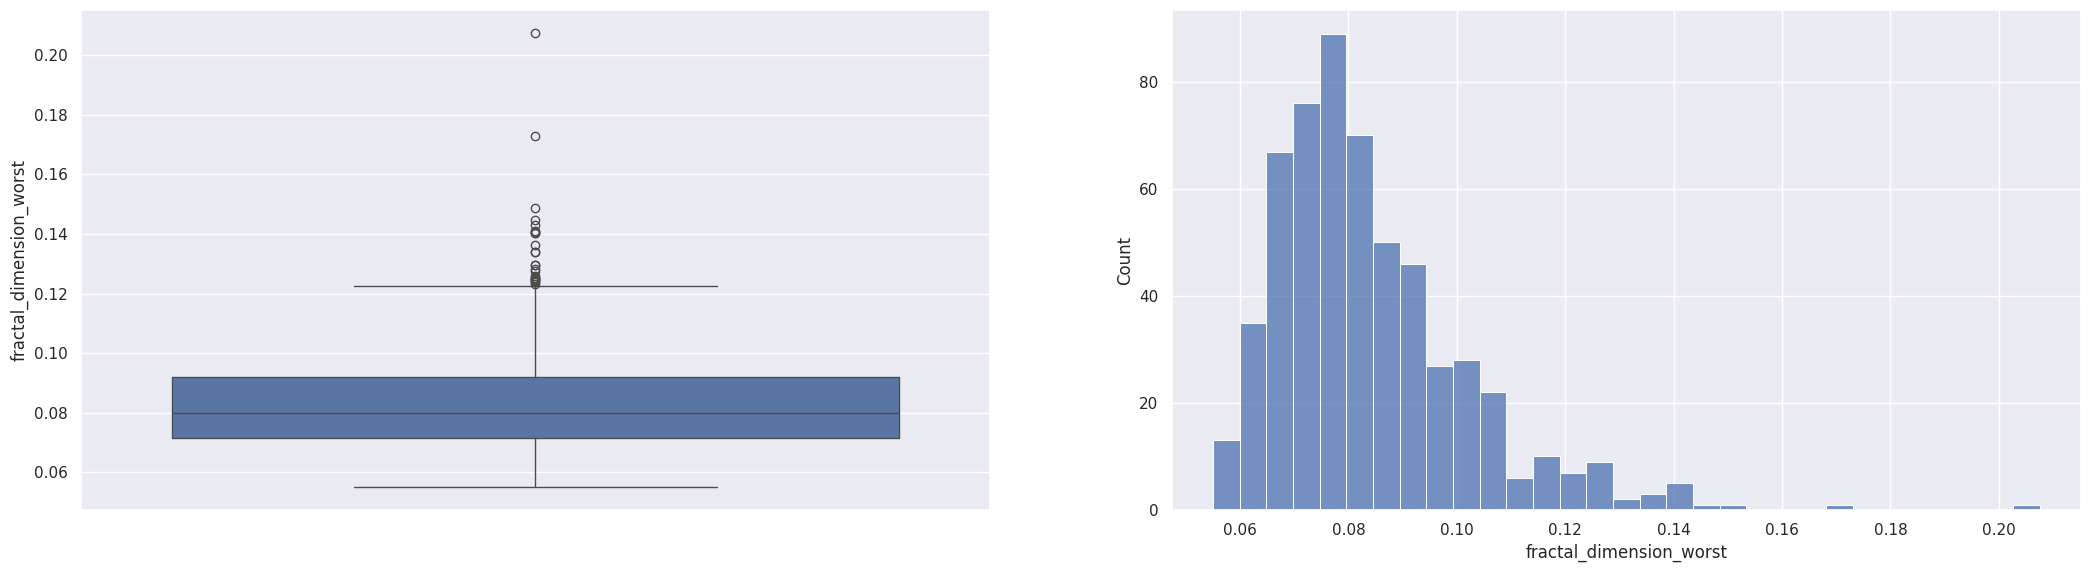

In [ ]:
col = pd.Series(Breast_Cancer_df.select_dtypes(include= ['int64', 'float64']).columns)
sns.set_theme()

for i in range(0,len(col)):
    f, axes = plt.subplots(1, 2, figsize=(10, 10))
    sns.boxplot(Breast_Cancer_df[col[i]], ax = axes[0])
    sns.histplot(Breast_Cancer_df[col[i]], ax = axes[1])
    plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

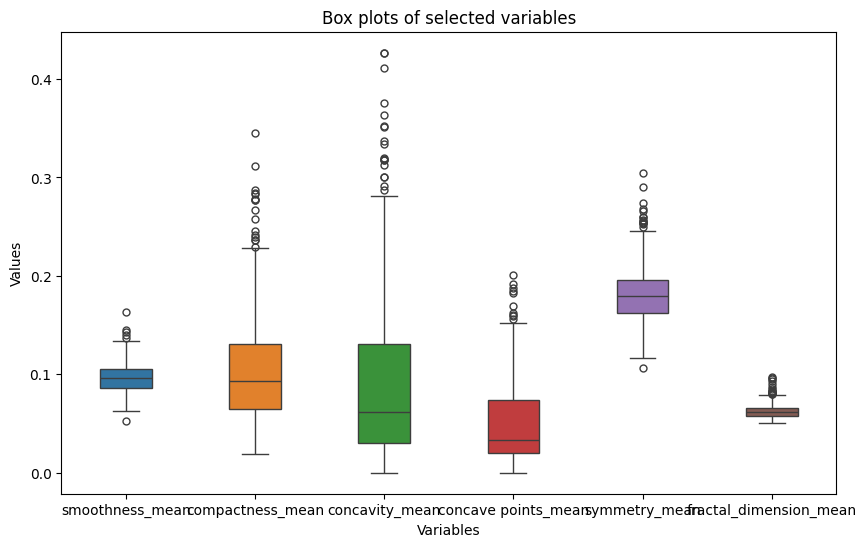

In [ ]:
# Select the subset of columns from the DataFrame
subset_df = Breast_Cancer_df.iloc[:, 5:11]

# Define colors for the box plots
#colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'cyan', 'royalblue']

# Create box plots using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
#sns.boxplot(data=subset_df, width=0.5, palette=colors, fliersize=5)
sns.boxplot(data=subset_df, width=0.4, fliersize=5)
# Set labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box plots of selected variables')

# Show the plot
plt.show()

<a id='2.3'></a><br>
#2.3. Target distribution

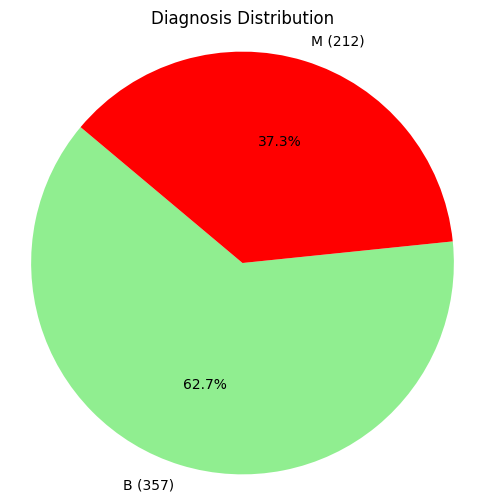

In [ ]:
# Count the occurrences of each unique value in the 'diagnosis' column
diagnosis_counts = Breast_Cancer_df['diagnosis'].value_counts()

# Define labels and values for the pie
labels = [f"{label} ({count})" for label, count in diagnosis_counts.items()]
values = [diagnosis_counts['B'], diagnosis_counts['M']]

# Define colors for the pie chart
colors = ['lightgreen', 'red']

# Create the pie chart using Seaborn
plt.figure(figsize=(6, 6))  # Adjust figure size if necessary
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)

# Add a title
plt.title('Diagnosis Distribution')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<a id='2.4'></a><br>
#2.4. Joint and marginal Feature distributions

* Joint distribution is the probability of multiple random variables having specific values at the same time.
* Marginal distribution is the probability of one random variable having a specific value, regardless of the value of any other random variables.


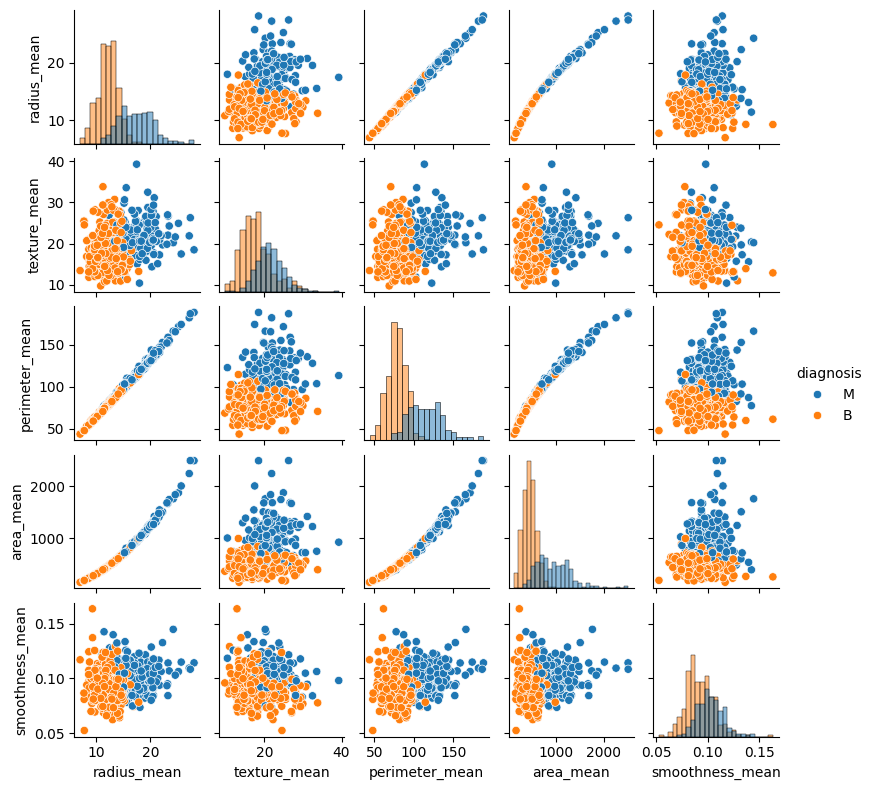

In [ ]:
sns.pairplot(Breast_Cancer_df.iloc[:,:30],hue='diagnosis', diag_kind='hist',height=1.6)

In [ ]:
# Visualize the pairwise relationships using pairplot
#sns.pairplot(Breast_Cancer_df.iloc[:, 1:])
sns.pairplot(Breast_Cancer_df.iloc[:,:30],hue='diagnosis', diag_kind='hist',height=1.6)

Output hidden; open in https://colab.research.google.com to view.

**Observation** The diagonal plots are the kde-plots for each variable/feature. The upper and the lower triangle are essentially mirror images of each other.

One major take-away from these plots to observe that there is a certain level of separation between the malignant and the benign data types which can make it helpful to use these features to design a machine learning algorithm.

<a id='2.5'></a><br>
#2.5. Correlation matrix

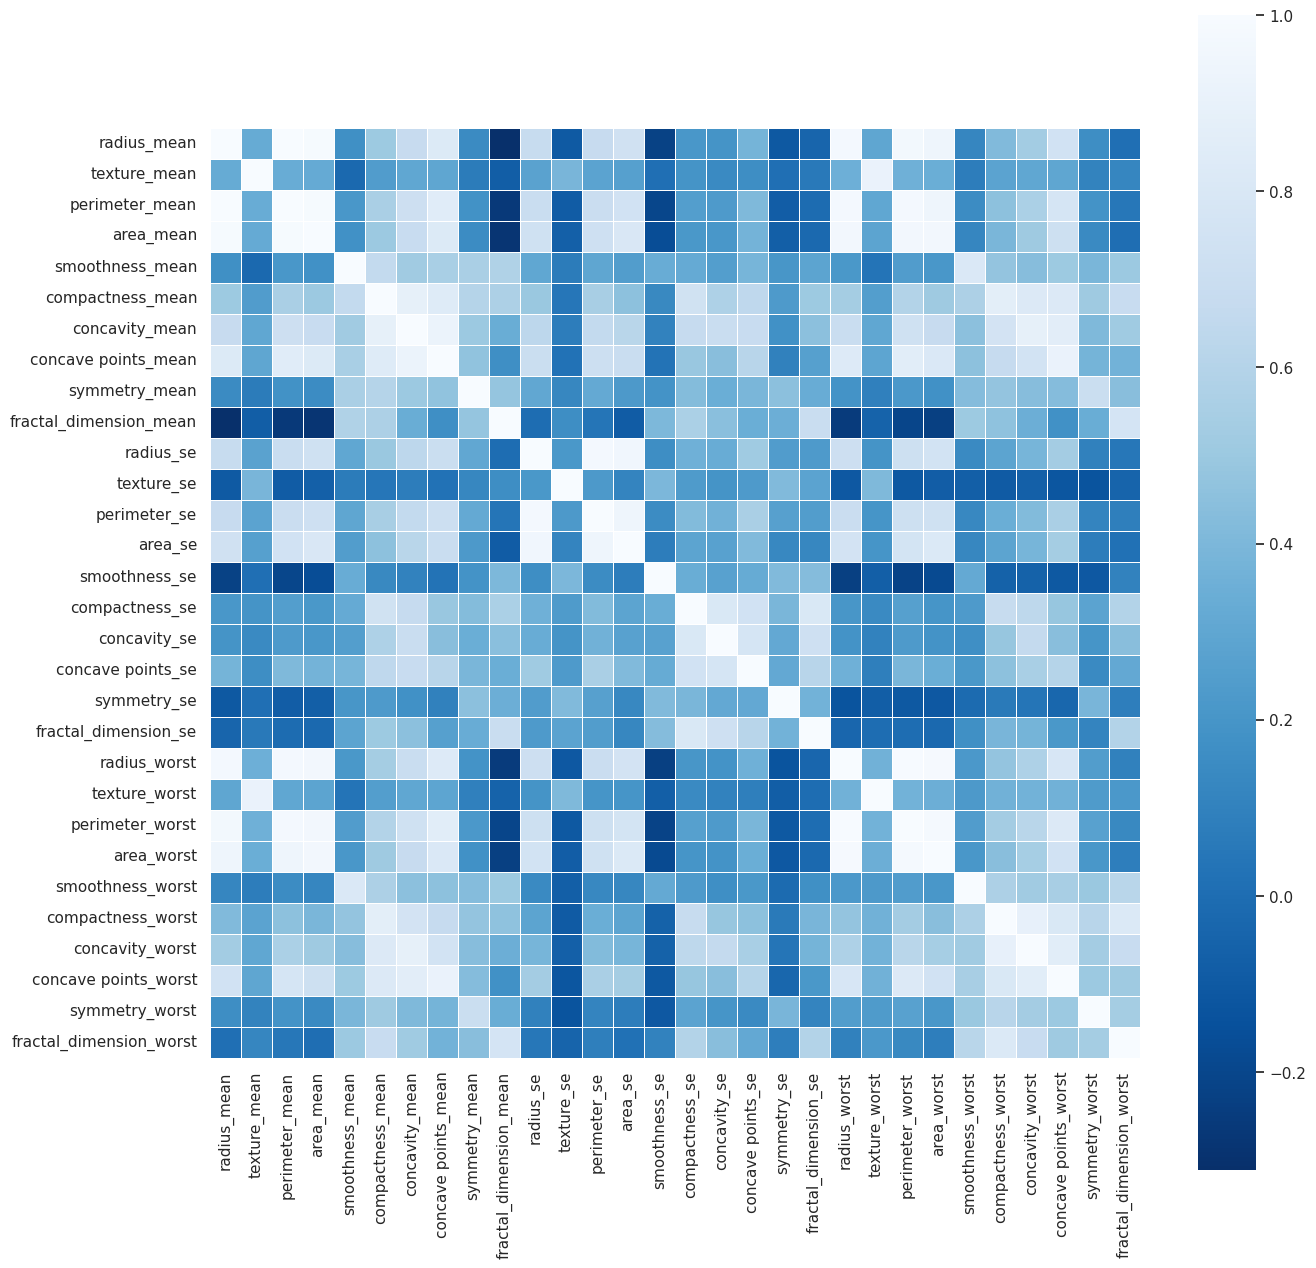

In [ ]:
corr = Breast_Cancer_df.iloc[:, 1:].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = False, fmt = '.3f', linewidths = .5, square = True, cmap='Blues_r')
plt.show()

**Observations:** In a correlation hat map, the way its interpreted is higher the correlation value, the more correlated the two variables(features) are:

1. Radius, Area and Perimeter are correlated (corr>0.9) which is obvious as area and perimeter is calculated using the radius values.
2. Texture_mean and texture_worst are higly correlated with corr_value = 0.98 (texture_worst is the largest value of all the textures).
3. Compactness_mean,concavity_mean,concave_points_mean are also highy correlated with values in range 0.7 to 0.9.
4. Symmetry_mean and symmetry_worst are correlated too by values 0.7.
5. Fractural_dimension_mean and fractural_dimension_worst are correlated by value 0.77

<a id='3'></a><br>
#3. Data preprocessing and Feature Engineering
<a id='3.1'></a><br>
#3.1. Encoding labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Breast_Cancer_df['diagnosis'] = le.fit_transform(Breast_Cancer_df['diagnosis']) # M:1, B:0
Breast_Cancer_df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<a id='3.2'></a><br>
#3. 2. Data split

In [ ]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(Breast_Cancer_df.iloc[:,1:], Breast_Cancer_df['diagnosis'], test_size = 0.2, random_state = random_state)

<a id='3.3'></a><br>
#3. 3. Feature Engineering
<a id='3.3.1'></a><br>
#3.3.1. Scaler

<strong>RobustScaler</strong>, a robust scaling technique in machine learning, effectively <strong>addresses outliers</strong> by removing the median and scaling data based on the interquartile range (IQR). Unlike standard scalers, RobustScaler mitigates outliers' negative impact on mean and variance, crucial for accurate feature scaling. By centering data around the median and scaling according to IQR, RobustScaler ensures outlier resilience, enhancing data representation for sensitive algorithms. It provides a robust solution for datasets with extreme outliers, maintaining data integrity and improving machine learning model performance. RobustScaler stands as a reliable choice for preprocessing skewed datasets, offering stability and accuracy in feature scaling.

In [ ]:
scale = RobustScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

<a id='3.3.2'></a><br>
#3.3.2. Dimensionality reduction


In analyzing our dataset, we've identified highly correlated features like radius_mean, perimeter_mean, and area_mean, which possess similar effects on the dependent variable. To tackle the curse of dimensionality, a common issue in classification algorithms due to excessive features leading to computational burden and overfitting, we aim for feature reduction techniques.

Two primary methods stand out: Principal Component Analysis (PCA) and Recursive Feature Elimination (RFE). PCA transforms correlated features into a smaller set of uncorrelated components, preserving variance. RFE recursively removes least significant features based on model performance.

Implementing PCA and RFE separately, we'll evaluate their efficacy on classification algorithms. The choice between these techniques depends on algorithm requirements and data characteristics. We'll examine how each method influences model performance, considering factors like interpretability, computational efficiency, and predictive accuracy. This comparative analysis will guide our feature reduction strategy, optimizing model performance while mitigating the curse of dimensionality.

<a id='3.3.3'></a><br>
#Principal component analysis (PCA)



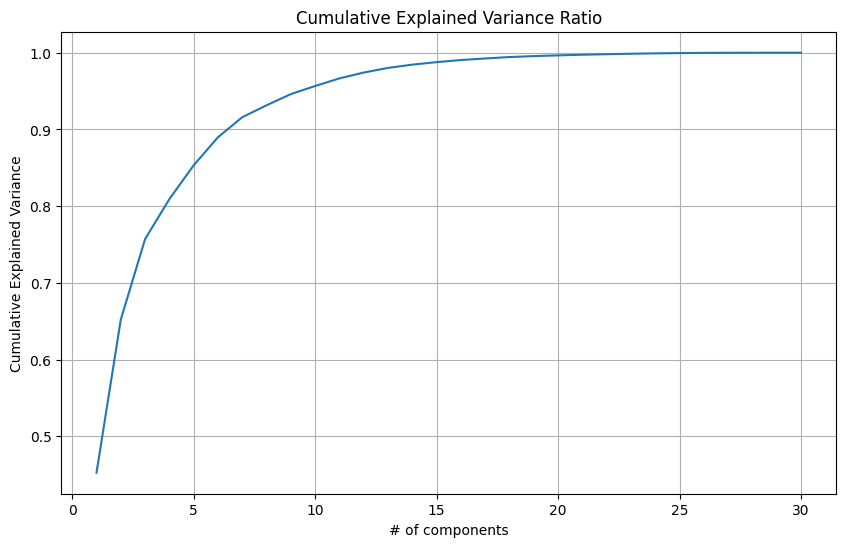

In [ ]:
pca = PCA()
pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(1, exp_var_cumul.shape[0] + 1), y=exp_var_cumul, markers=True)

# Set labels and title
plt.xlabel('# of components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')

# Show the plot
plt.grid(True)
plt.show()

The seventh component marks an elbow, explaining 91% of total variance. Keeping the first 10 or 17 principal components preserves 95% or more than 99% of total variance, respectively.
<a id='3.3.4'></a><br>
# Recursive features elimination(RFE)
Recursive Feature Elimination (RFE) is a method for feature selection. It involves iteratively training models and removing the least informative features until achieving the optimal feature subset for maximizing results.



Optimal number of features : 4


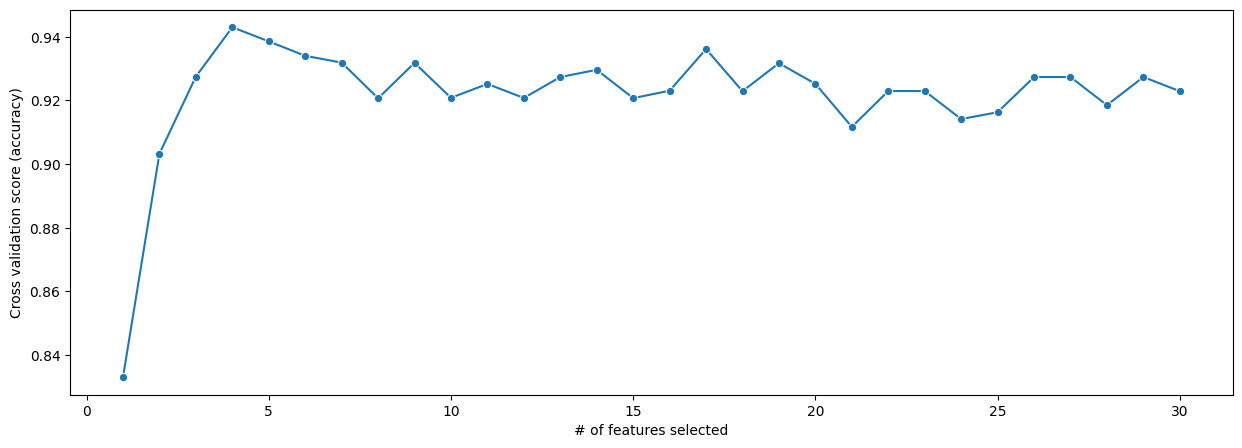

In [ ]:
# Fit the RFE model to identify the optimum number of features
rfecv = RFECV(
    cv=StratifiedKFold(n_splits=10, random_state=random_state, shuffle=True),
    estimator=DecisionTreeClassifier(),
    #estimator=RandomForestClassifier(),
    scoring='accuracy'
)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15, 5))
sns.lineplot(
    x=range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
    y=rfecv.cv_results_['mean_test_score'],
    marker='o'
)
plt.xlabel("# of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.show()

Visualizing the model's performance versus the number of features highlights how accuracy fluctuates with feature count. Notably, increasing features doesn't always enhance accuracy. Optimal accuracy often occurs when utilizing the most important features initially.

In [ ]:
# Identifying the features RFE selected
df_features = pd.DataFrame(columns=['feature', 'support', 'ranking'])

data = []
for i in range(X_train.shape[1]):
    data.append({'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]})

df_features = pd.concat([df_features, pd.DataFrame(data)], ignore_index=True)

df_features.sort_values(by='ranking').head(10)

,feature,support,ranking
22,22,True,1
21,21,True,1
7,7,True,1
27,27,True,1
20,20,False,2
19,19,False,3
17,17,False,4
10,10,False,5
24,24,False,6
14,14,False,7


In [ ]:
# Identifying the features' name RFE selected
Breast_Cancer_df.columns[1:][rfecv.get_support()]

Index(['concave points_mean', 'texture_worst', 'perimeter_worst',
       'concave points_worst'],
      dtype='object')

<a id='4'></a><br>
# 4. Grid Search Cross

Grid Search Cross Validation is a hyperparameter tuning technique used to optimize machine learning models. It systematically searches through a predefined grid of hyperparameters to find the combination that yields the best performance. Cross-validation is employed to assess model performance by dividing the dataset into subsets, training the model on a portion, and evaluating it on the rest. This process iterates across all combinations of hyperparameters, utilizing cross-validation each time. Grid Search Cross Validation helps in selecting the optimal hyperparameters, ensuring the model generalizes well to unseen data and minimizing overfitting.
<a id='4.1'></a><br>
#4.1. Function to find the best hyperparameters

In [ ]:
def modelselection(classifier, parameters, scoring, X_train):
    clf = GridSearchCV(estimator=classifier,
                   param_grid=parameters,
                   scoring= scoring,
                   cv=5,
                   n_jobs=-1)# n_jobs refers to the number of CPU's that you want to use for excution, -1 means that use all available computing power.
    clf.fit(X_train, y_train)
    cv_results = clf.cv_results_
    best_parameters = clf.best_params_
    best_result = clf.best_score_
    print('The best parameters for classifier is', best_parameters)
    print('The best training score is %.3f:'% best_result)
#    print(sorted(cv_results.keys()))
    return cv_results, best_parameters, best_result

<a id='4.2'></a><br>
#4.2. Function to find  # of Components in PCA versus Model Accuracy/Training Time

In [ ]:
def PCA_curves(PCA_cv_score, PCA_test_score, PCA_cv_training_time):
    # Create a DataFrame for the PCA curves data
    data = {
        'Components': list(range(1, len(PCA_cv_score) + 1)),
        'CV Score': PCA_cv_score,
        'Test Score': PCA_test_score,
        'CV Training Time': PCA_cv_training_time
    }
    df = pd.DataFrame(data)

    # Create subplots for PCA curves
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    # Plot PCA cross-validation scores
    sns.lineplot(data=df, x='Components', y='CV Score', ax=axes[0])
    axes[0].set_title('PCA Cross-Validation Scores')

    # Plot PCA test scores
    sns.lineplot(data=df, x='Components', y='Test Score', ax=axes[1])
    axes[1].set_title('PCA Test Scores')

    # Plot PCA cross-validation training time
    sns.lineplot(data=df, x='Components', y='CV Training Time', ax=axes[2])
    axes[2].set_title('PCA Cross-Validation Training Time')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

<a id='5'></a><br>
#5. Model Success metrics
<a id='5.1'></a><br>
#5.1. Confusion Matrices & other Metrics

A confusion matrix is a table that categorizes predictions according to whether they match the actual value

True Positive (TP): Malignant tumour correctly classified as Malignant
True Negative (TN): Benign tumour correctly classified as benign
False Positive (FP): Benign tumour incorrectly classified as malignant
False Negative (FN): Malignant tumour incorrectly classified as benign
Metrics

Accuracy (called the success rate): (tp+tn)/(tp+tn+fp+fn)
Sensitivity (also called the true positive rate): tp/(tp+fn)
Specificity (also called the true negative rate): tn/(tn+fp)
Precision (also called the positive predictive value): tp/(tp+fp)
Recall: as the same as sensitivity
F-measure: 2PrecisionRecall/(Recall+Precision) = 2tp/(2tp+fp+fn)

In [ ]:
def metrics(X,CV_clf):
    y_pred = CV_clf.predict(X)
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    Accuracy=(tp+tn)/(tp+tn+fp+fn)
    Sensitivity=tp/(tp+fn)
    Specificity=tn/(tn+fp)
    Precision=tp/(tp+fp)
    F_measure=2*tp/(2*tp+fp+fn)
    print('Accuracy=%.3f'%Accuracy)
    print('Sensitivity=%.3f'%Sensitivity) # as the same as recall
    print('Specificity=%.3f'%Specificity)
    print('Precision=%.3f'%Precision)
    print('F-measure=%.3f'%F_measure)
    return Accuracy, Sensitivity, Specificity, Precision, F_measure
 #   plot_confusion_matrix(CV_clf, X_test, y_test)


<a id='5.2'></a><br>
#5.2. ROC curves (AUC)

ROC curves:
Summarize the trade-off between the true positive rate (sensitivity/recall) and false positive rate (1 – specificity) for a predictive model using different probability thresholds.

used when datasets for each class are roughly equal.

A classifier with no predictive value: a curve falls close to the diagonal line.

A perfect classifier: a curve passes through the point at a 100% true positive rate and 0% false positive rate.

AUC: measure the area under the ROC curve, range from 0.5 (for a classifier with no predictive value) to 1.0 (for a perfect classifier).
<a id='5.3'></a><br>
#5.3 Precision-recall curves

Summarize the trade-off between the true positive rate (sensitivity/recall) and the positive predictive value (precision) for a predictive model using different probability thresholds.

used when datasets for each class are moderate to large imbalance.

A perfect classifier: a curve bows towards (1,1) and above the flat line (y=0.5) of no skill.

In [ ]:
def plot_roc_prc():
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    prc_auc = auc(recall, precision)

    plt.figure(figsize=(15, 5))

    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC={roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label=f'PR Curve (AUC={prc_auc:.4f})')
    plt.axhline(y=0.5, color='gray', linestyle='--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

<a id='6'></a><br>
#6. Model comparison
<a id='6.1'></a><br>
#6.1. Decision Tree Classifier

In [ ]:
classifier_log = DecisionTreeClassifier(random_state=random_state)
parameters_log = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

scoring='accuracy'
cv_results, best_param, best_result = modelselection(classifier_log, parameters_log, scoring, X_train)

The best parameters for classifier is {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
The best training score is 0.943:


In [ ]:
# Classifier with the best hyperparameters
DecTree_clf = DecisionTreeClassifier(
    max_depth = best_param['max_depth'],
    min_samples_split = best_param ['min_samples_split'],
    min_samples_leaf = best_param['min_samples_leaf'] ,
    max_features = best_param['max_features'] ,
    criterion = best_param['criterion'],
     random_state = random_state)
DecTree_clf.fit(X_train, y_train)

# Metrics
DecTree_clf_metrics = metrics(X_test,DecTree_clf)

Accuracy=0.965
Sensitivity=0.907
Specificity=1.000
Precision=1.000
F-measure=0.951


In [ ]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


<a id='6.0.0'></a><br>
#6.0.0 Decision Tree Visualization

In [ ]:
X = Breast_Cancer_df.drop(columns=['diagnosis'])

In [ ]:
if not os.path.exists("./output/") : os.mkdir("./output/")
export_graphviz(
    DecTree_clf,
    out_file='./output/DecTree_clf.dot',
    feature_names=X.columns.values
)

In [ ]:
#To generate a PNG image from a DOT file and Make sure that the DOT file DecTree_clf.dot exists in your current directory or specify the correct path to it. After executing the command, the resulting PNG image (fig-DecTree_clf.png) will be created in the same directory.
#!ls
!dot -Tpng DecTree_clf.dot -o fig-DecTree_clf.png

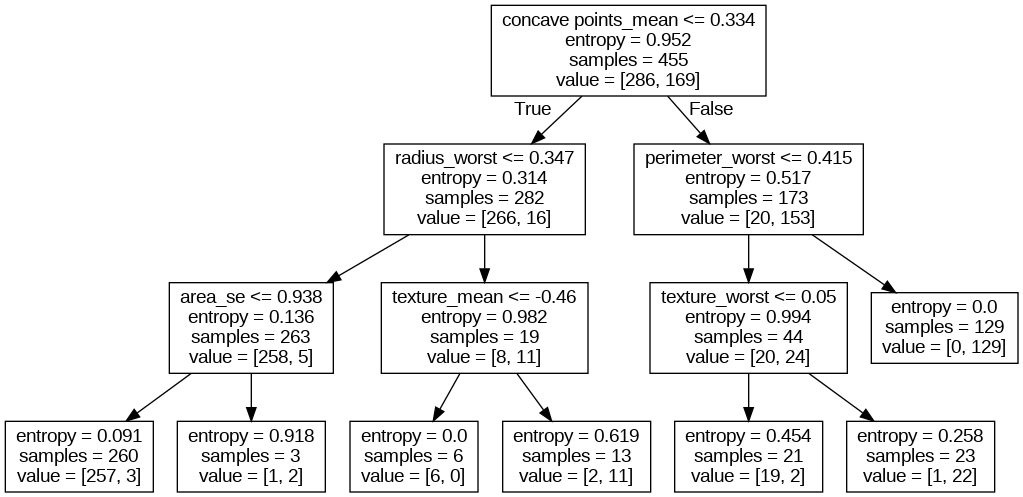

In [ ]:
from IPython.display import Image

# Specify the path to the image file
image_path = 'fig-DecTree_clf.png'

# Display the image
Image(image_path)

Impurity Reduction: Decision trees aim to reduce impurity or increase homogeneity in each node. If the split at "criterion <= 0.334" effectively reduces impurity in the resulting subsets, it can be considered a good split.

Information Gain: The split should maximize information gain, which represents the amount of uncertainty reduction achieved by splitting the data based on the selected feature and threshold. If the split at "criterion <= 0.334" leads to significant information gain, it is generally considered beneficial.

Interpretability: Decision trees are valued for their interpretability. If the split at "criterion <= 0.334" results in nodes that are easy to interpret and explain, it adds value to the decision tree model.

Overfitting: Decision trees are prone to overfitting, especially if they become overly complex. If the split at "criterion <= 0.334" leads to an excessively deep or complex tree, it may indicate overfitting, which is generally undesirable.

<a id='6.2'></a><br>
#6.2. Decision Tree Classification with PCA

In [ ]:
def compare_pca(n_components):
    cv_score, test_score, cv_training_time = [], [], []
    for n in n_components:
        print("The number of components in PCA is:%d "% n)
        pca = PCA(n_components=n, svd_solver="full",random_state=random_state)
        X_PCA_train = pca.fit_transform(X_train)
        X_PCA_test = pca.transform(X_test)
        # Model Selection
        cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)
        training_time = np.mean(np.array(cv_results['mean_fit_time'])+np.array(cv_results['mean_score_time']))
        cv_score.append(best_result)
        cv_training_time.append(training_time)
        CV_clf = DecisionTreeClassifier(
                              max_depth = best_param['max_depth'],
                              min_samples_split = best_param ['min_samples_split'],
                              min_samples_leaf = best_param['min_samples_leaf'] ,
                              max_features = best_param['max_features'] ,
                              criterion = best_param['criterion'],
                              random_state = random_state)
        CV_clf.fit(X_PCA_train, y_train)
        score = CV_clf.score(X_PCA_test, y_test)
        test_score.append(score)
    print(cv_score, test_score, cv_training_time)
    return cv_score, test_score, cv_training_time

In [ ]:
n_features = X_train.shape[1]
n = np.arange(2, n_features+2, 2)

PCA_cv_score, PCA_test_score, PCA_cv_training_time= compare_pca(n_components = n)

The number of components in PCA is:2 
The best parameters for classifier is {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
The best training score is 0.914:
The number of components in PCA is:4 
The best parameters for classifier is {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
The best training score is 0.932:
The number of components in PCA is:6 
The best parameters for classifier is {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
The best training score is 0.947:
The number of components in PCA is:8 
The best parameters for classifier is {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
The best training score is 0.941:
The number of components in PCA is:10 
The best parameters for classifier is {'criterion': 'gini', 'max_depth': 5, 'max_featu

<a id='6.2.1'></a><br>
#6.2.1. # of Components in PCA versus Model Accuracy/Training Time

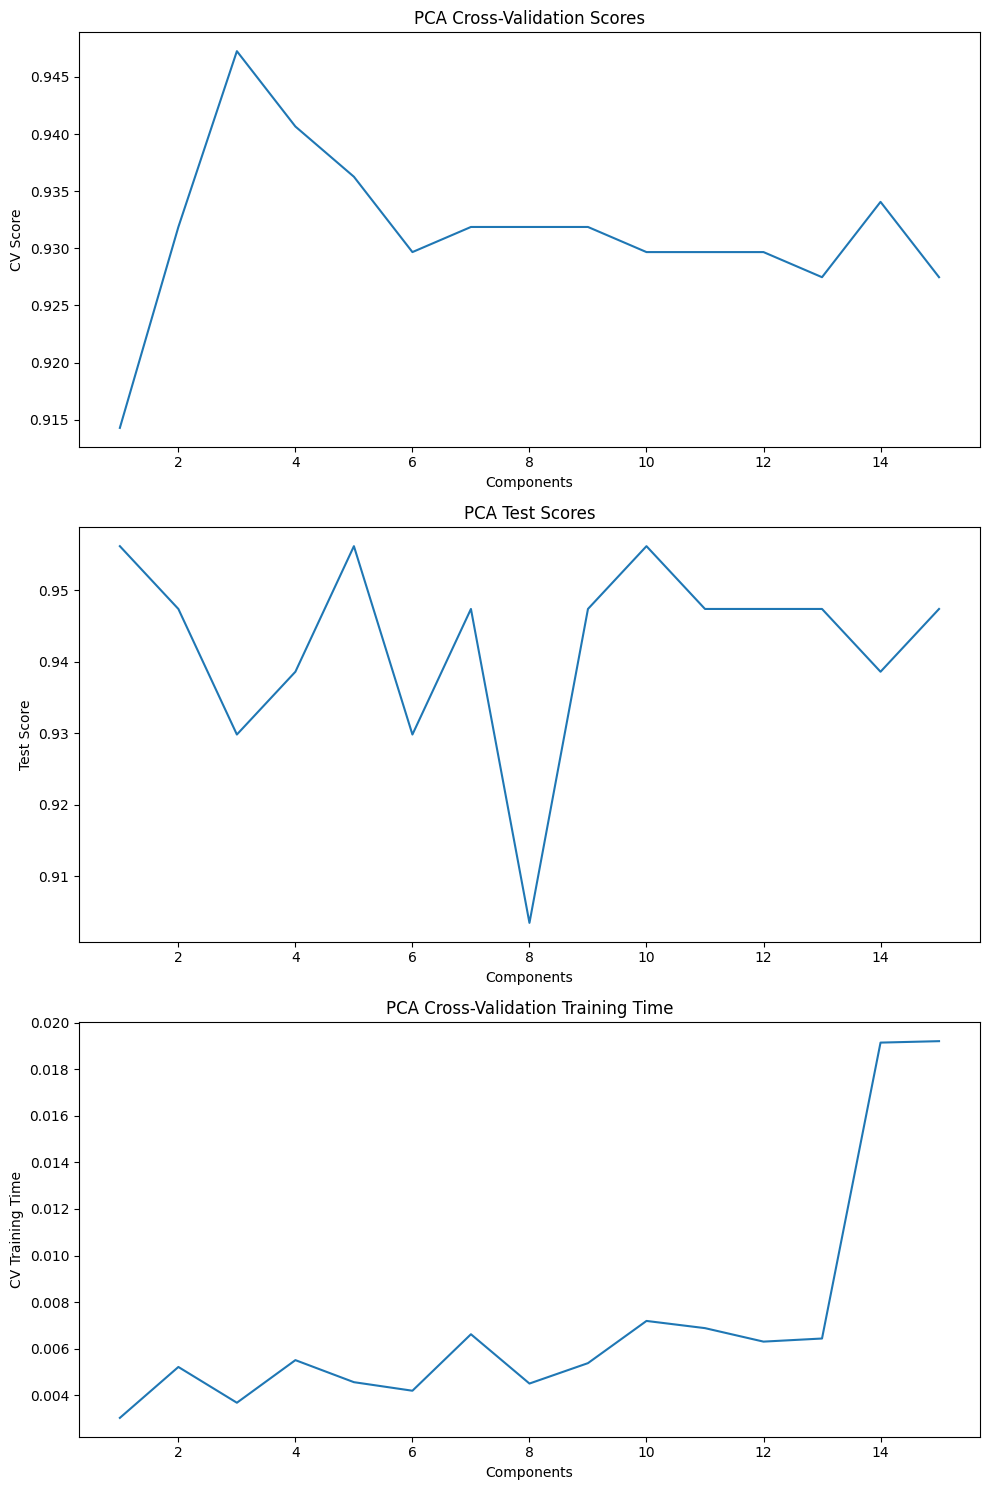

In [ ]:
PCA_curves(PCA_cv_score,PCA_test_score,PCA_cv_training_time)

<a id='6.2.2'></a><br>
#6.2.2. Decision Tree Classification with PCA ( 2 components)

In [ ]:
i =PCA_test_score.index(max(PCA_test_score))
print('The best accuracy of Decision Tree classifier is: %.3f'%  max(PCA_test_score)+', where the total number of components in PCA is {:.0f}'.format((i+1)*2))

The best accuracy of Decision Tree classifier is: 0.956, where the total number of components in PCA is 2


The best parameters for classifier is {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
The best training score is 0.914:
Accuracy=0.956
Sensitivity=0.907
Specificity=0.986
Precision=0.975
F-measure=0.940


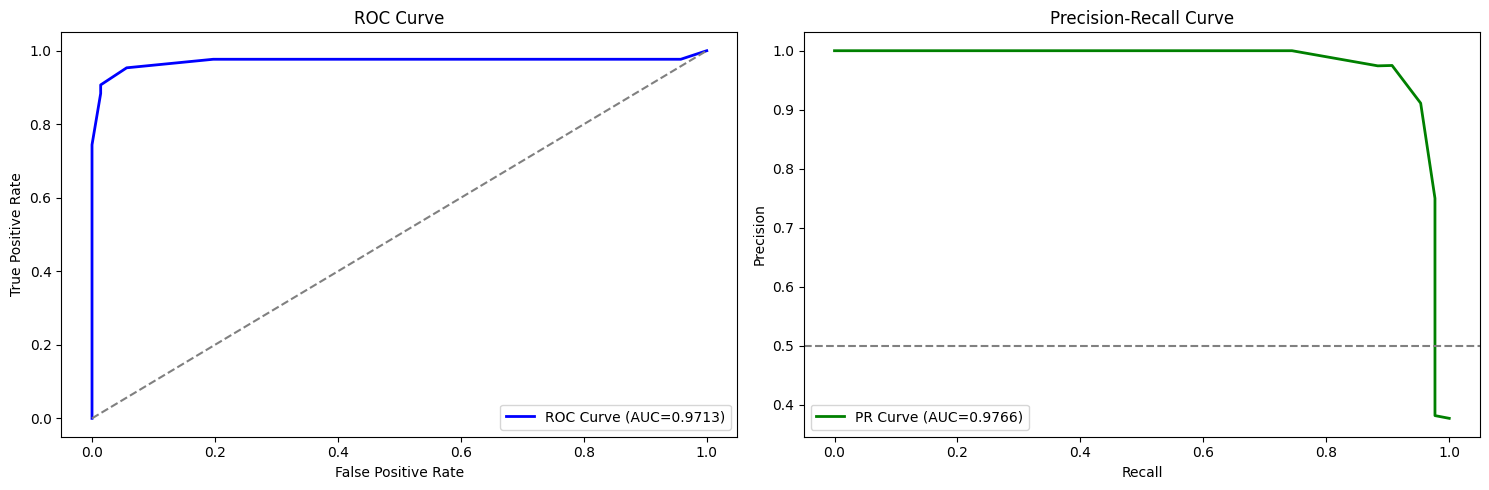

In [ ]:
pca = PCA(n_components=(i+1)*2, svd_solver="full",random_state=random_state)
X_PCA_train = pca.fit_transform(X_train)
X_PCA_test = pca.transform(X_test)
# Model Selection
cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)

# Classifier with the best hyperparameters
DecTreeClf_PCA = DecisionTreeClassifier(
                              max_depth = best_param['max_depth'],
                              min_samples_split = best_param ['min_samples_split'],
                              min_samples_leaf = best_param['min_samples_leaf'] ,
                              max_features = best_param['max_features'] ,
                              criterion = best_param['criterion'],
                              random_state = random_state)
DecTreeClf_PCA.fit(X_PCA_train, y_train)

# Metrics
DecTreeClf_PCA_metrics = metrics(X_PCA_test,DecTreeClf_PCA)

# ROC Curve & Precision-Recall Curves
y_score = DecTreeClf_PCA.predict_proba(X_PCA_test)[:, 1] # predict probabilities
plot_roc_prc()


To optimize the tradeoff between True Positive Rate (TPR) and False Positive Rate (FPR), we adjust the threshold applied to predicted probabilities. For instance, a threshold of 0.2 could classify a negative outcome (0) as positive (1), enhancing TPR at the expense of FPR. Prioritizing TPR is crucial in medical contexts like tumor detection, where early treatment is paramount. Balancing this, we seek a lower FPR to avoid undue stress from misclassifying benign tumors. Selection of the threshold hinges on assessing these tradeoffs, often guided by domain expertise, risk tolerance, and validation techniques.

<a id='6.2.3'></a><br>
#6.2.3. Adjusting thresholds for metrics

threshold = 0.1 : Accuracy=0.868 Sensitivity=0.977 Specificity=0.803 Precision=0.750
threshold = 0.2 : Accuracy=0.947 Sensitivity=0.953 Specificity=0.944 Precision=0.911
threshold = 0.3 : Accuracy=0.947 Sensitivity=0.953 Specificity=0.944 Precision=0.911
threshold = 0.4 : Accuracy=0.947 Sensitivity=0.953 Specificity=0.944 Precision=0.911
threshold = 0.5 : Accuracy=0.956 Sensitivity=0.907 Specificity=0.986 Precision=0.975
threshold = 0.6 : Accuracy=0.956 Sensitivity=0.907 Specificity=0.986 Precision=0.975
threshold = 0.7 : Accuracy=0.947 Sensitivity=0.884 Specificity=0.986 Precision=0.974
threshold = 0.8 : Accuracy=0.904 Sensitivity=0.744 Specificity=1.000 Precision=1.000
threshold = 0.9 : Accuracy=0.904 Sensitivity=0.744 Specificity=1.000 Precision=1.000


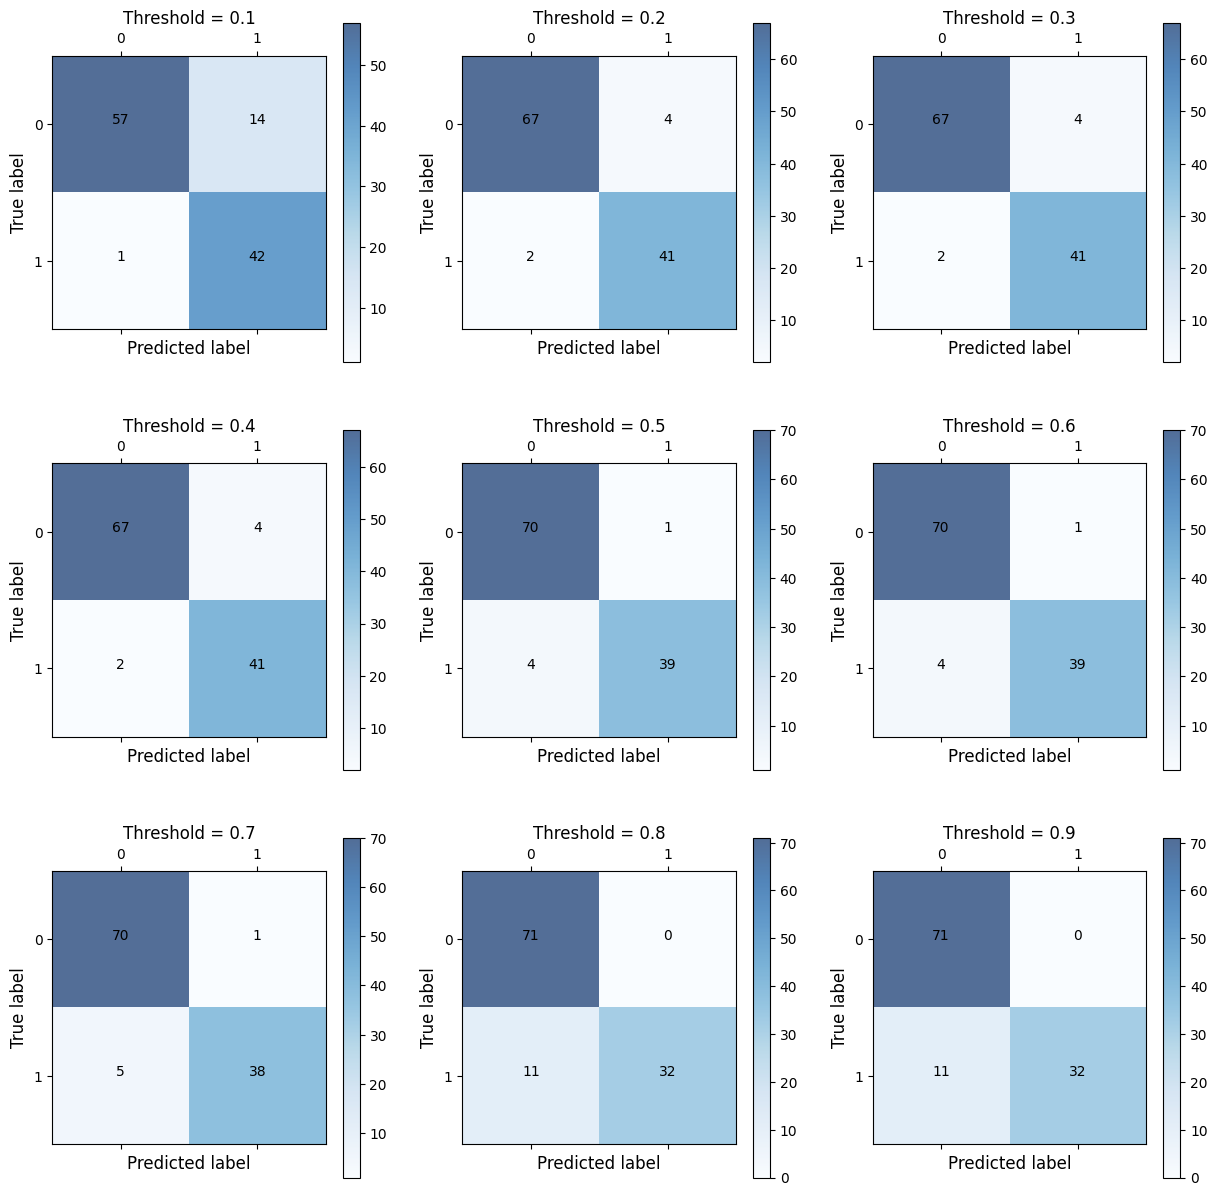

In [ ]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for n, ax in zip(thresholds,axs.ravel()):
    y_score = DecTreeClf_PCA.predict_proba(X_PCA_test)[:,1] > n

    cm = confusion_matrix(y_test, y_score)

    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('threshold = %s :'%n,
          'Accuracy={:.3f}'.format((tp+tn)/(tp+tn+fp+fn)),
          'Sensitivity={:.3f}'.format(tp/(tp+fn)),
          'Specificity={:.3f}'.format(tn/(tn+fp)),
          'Precision={:.3f}'.format(tp/(tp+fp)))

    im=ax.matshow(cm, cmap='Blues', alpha=0.7)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        ax.text(j, i, cm[i, j], horizontalalignment = 'center')

    ax.set_ylabel('True label',fontsize=12)
    ax.set_xlabel('Predicted label',fontsize=12)
    ax.set_title('Threshold = %s'%n, fontsize=12)
    fig.colorbar(im, ax=ax,orientation='vertical');
plt.show()

<a id='6.3'></a><br>
#6.3. Random Forest

In [ ]:
parameters_rf = {
    'n_estimators': [20, 50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
}
# We can test values for other parameters, such as max_features, max_depth, max_leaf_nodes, to see if the accuracy further impoves or not
scoring_rf = 'accuracy'
"""
    scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
"""
classifier_rf = RandomForestClassifier(random_state=random_state)

# Find the best hyperparameters
cv_results, best_param, best_result = modelselection(classifier_rf,parameters_rf, scoring_rf, X_train)

# Classifier with the best hyperparameters
rf_clf = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                criterion = best_param['criterion'],
                                bootstrap = best_param['bootstrap'],
                                random_state=random_state)
rf_clf.fit(X_train, y_train)

# Metrics
rf_metrics = metrics(X_test,rf_clf)

The best parameters for classifier is {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}
The best training score is 0.967:
Accuracy=0.965
Sensitivity=0.930
Specificity=0.986
Precision=0.976
F-measure=0.952


<a id='6.4'></a><br>
#6.4. Random Forest with PCA

In [ ]:
def compare_pca(n_components):
    cv_score, test_score, cv_training_time = [], [], []
    for n in n_components:
        print("The number of components in PCA is:%d "% n)
        pca = PCA(n_components=n, svd_solver="full",random_state=random_state)
        X_PCA_train = pca.fit_transform(X_train)
        X_PCA_test = pca.transform(X_test)
        # Model Selection
        cv_results, best_param, best_result = modelselection(classifier_rf,parameters_rf, scoring, X_PCA_train)
        training_time = np.mean(np.array(cv_results['mean_fit_time'])+np.array(cv_results['mean_score_time']))
        cv_score.append(best_result)
        cv_training_time.append(training_time)
        CV_clf = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                        criterion = best_param['criterion'],
                                        bootstrap = best_param['bootstrap'],
                                        random_state=random_state)
        CV_clf.fit(X_PCA_train, y_train)
        score = CV_clf.score(X_PCA_test, y_test)
        test_score.append(score)
    print(cv_score, test_score, cv_training_time)
    return cv_score, test_score, cv_training_time

In [ ]:
n_features = X_train.shape[1]
n = np.arange(2, n_features+2, 2)
PCA_cv_score, PCA_test_score, PCA_cv_training_time= compare_pca(n_components = n)

The number of components in PCA is:2 
The best parameters for classifier is {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 150}
The best training score is 0.919:
The number of components in PCA is:4 
The best parameters for classifier is {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 50}
The best training score is 0.941:
The number of components in PCA is:6 
The best parameters for classifier is {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 200}
The best training score is 0.967:
The number of components in PCA is:8 
The best parameters for classifier is {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 200}
The best training score is 0.965:
The number of components in PCA is:10 
The best parameters for classifier is {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 200}
The best training score is 0.963:
The number of components in PCA is:12 
The best parameters for classifier is {'bootstrap': False, 'criterion': 'entropy', 'n_estimat

<a id='6.4.1'></a><br>
#6.4.1. # of Components in PCA versus Model Accuracy/Training Time

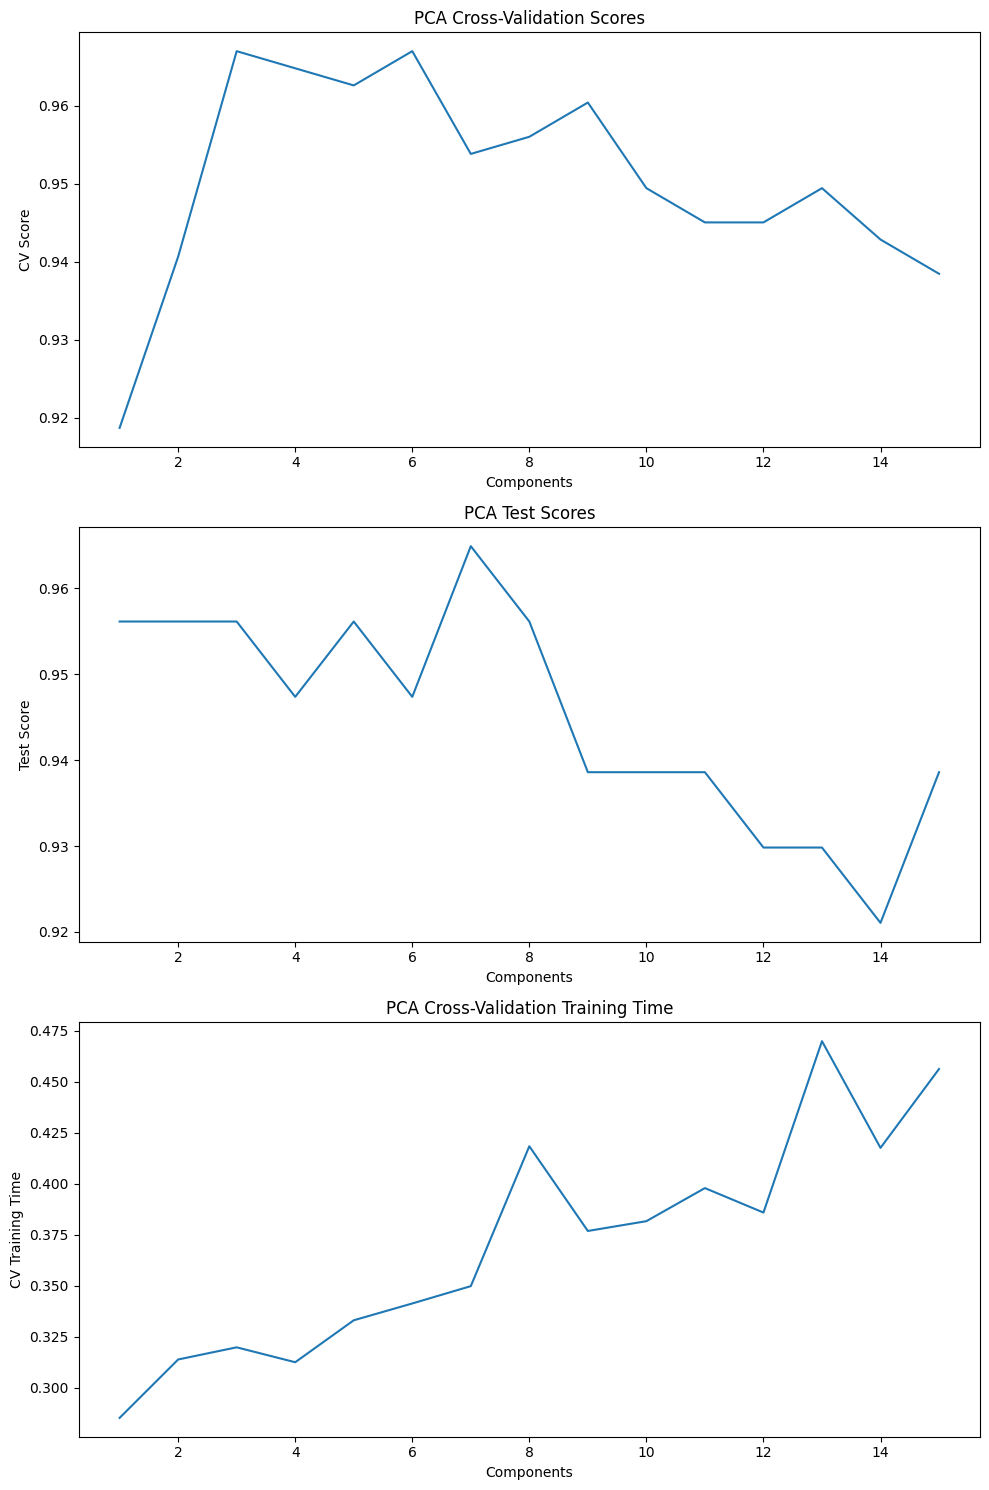

In [ ]:
PCA_curves(PCA_cv_score, PCA_test_score, PCA_cv_training_time)


<a id='6.4.2'></a><br>
#6.4.2. Random Forest Classification with PCA (14 components)

In [ ]:
i =PCA_test_score.index(max(PCA_test_score))
pca = PCA(n_components=(i+2)*2, svd_solver="full",random_state=random_state)
X_PCA_train = pca.fit_transform(X_train)
X_PCA_test = pca.transform(X_test)
# Model Selection
cv_results, best_param, best_result = modelselection(classifier_rf,parameters_rf, scoring, X_PCA_train)
rf_PCA = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                criterion = best_param['criterion'],
                                bootstrap = best_param['bootstrap'],
                                random_state=random_state)
rf_PCA.fit(X_PCA_train, y_train)
# Metrics
rf_PCA_metrics = metrics(X_PCA_test,rf_PCA)

The best parameters for classifier is {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 100}
The best training score is 0.956:
Accuracy=0.956
Sensitivity=0.953
Specificity=0.958
Precision=0.932
F-measure=0.943


<a id='6.5'></a><br>
#6.5. Random Forest with RFE ( Recursive features elimination)

In [ ]:
X_train_selected = X_train[:,rfecv.get_support()]
X_test_selected = X_test[:,rfecv.get_support()]

cv_results, best_param, best_result = modelselection(classifier_rf,parameters_rf, scoring_rf, X_train_selected)

# Classifier with the best hyperparameters
rf_RFE = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                criterion = best_param['criterion'],
                                bootstrap = best_param['bootstrap'],
                                random_state=random_state)
rf_RFE.fit(X_train_selected, y_train)

# Metrics
rf_RFE_metrics = metrics(X_test_selected ,rf_RFE)

The best parameters for classifier is {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
The best training score is 0.956:
Accuracy=0.947
Sensitivity=0.907
Specificity=0.972
Precision=0.951
F-measure=0.929


<a id='6.6'></a><br>
#6.6. logisitic Regression

In [ ]:
classifier_log = LogisticRegression(random_state=random_state,solver='lbfgs', max_iter=1000)
parameters_log = {
            'penalty' : ['l2'],
            'C' : [0.01, 0.1, 1, 10, 100]
}
scoring='accuracy'   # scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Find the best hyperparameters
cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_train)


The best parameters for classifier is {'C': 10, 'penalty': 'l2'}
The best training score is 0.978:


In [ ]:
# Classifier with the best hyperparameters
logReg_clf = LogisticRegression(penalty = best_param['penalty'],
                            C = best_param['C'],
                            random_state=random_state)
logReg_clf.fit(X_train, y_train)

# Metrics
logReg_metrics = metrics(X_test,logReg_clf)

Accuracy=0.974
Sensitivity=0.977
Specificity=0.972
Precision=0.955
F-measure=0.966


<a id='6.7'></a><br>
#6.7. logistic Regression with PCA

In [ ]:
def compare_pca(n_components):
    cv_score, test_score, cv_training_time = [], [], []
    for n in n_components:
        print("The number of components in PCA is:%d "% n)
        pca = PCA(n_components=n, svd_solver="full",random_state=random_state)
        X_PCA_train = pca.fit_transform(X_train)
        X_PCA_test = pca.transform(X_test)
        # Model Selection
        cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)
        training_time = np.mean(np.array(cv_results['mean_fit_time'])+np.array(cv_results['mean_score_time']))
        cv_score.append(best_result)
        cv_training_time.append(training_time)
        CV_clf = LogisticRegression(penalty = best_param['penalty'],
                                    C = best_param['C'],
                                    random_state=random_state)
        CV_clf.fit(X_PCA_train, y_train)
        score = CV_clf.score(X_PCA_test, y_test)
        test_score.append(score)
    print(cv_score, test_score, cv_training_time)
    return cv_score, test_score, cv_training_time

In [ ]:
n_features = X_train.shape[1]
n = np.arange(2, n_features+2, 2)

PCA_cv_score, PCA_test_score, PCA_cv_training_time= compare_pca(n_components = n)

The number of components in PCA is:2 
The best parameters for classifier is {'C': 100, 'penalty': 'l2'}
The best training score is 0.921:
The number of components in PCA is:4 
The best parameters for classifier is {'C': 1, 'penalty': 'l2'}
The best training score is 0.954:
The number of components in PCA is:6 
The best parameters for classifier is {'C': 10, 'penalty': 'l2'}
The best training score is 0.965:
The number of components in PCA is:8 
The best parameters for classifier is {'C': 0.1, 'penalty': 'l2'}
The best training score is 0.967:
The number of components in PCA is:10 
The best parameters for classifier is {'C': 1, 'penalty': 'l2'}
The best training score is 0.974:
The number of components in PCA is:12 
The best parameters for classifier is {'C': 1, 'penalty': 'l2'}
The best training score is 0.969:
The number of components in PCA is:14 
The best parameters for classifier is {'C': 1, 'penalty': 'l2'}
The best training score is 0.974:
The number of components in PCA is:16 
T

<a id='6.7.1'></a><br>
#6.7.1. # of Components in PCA versus Model Accuracy/Training Time

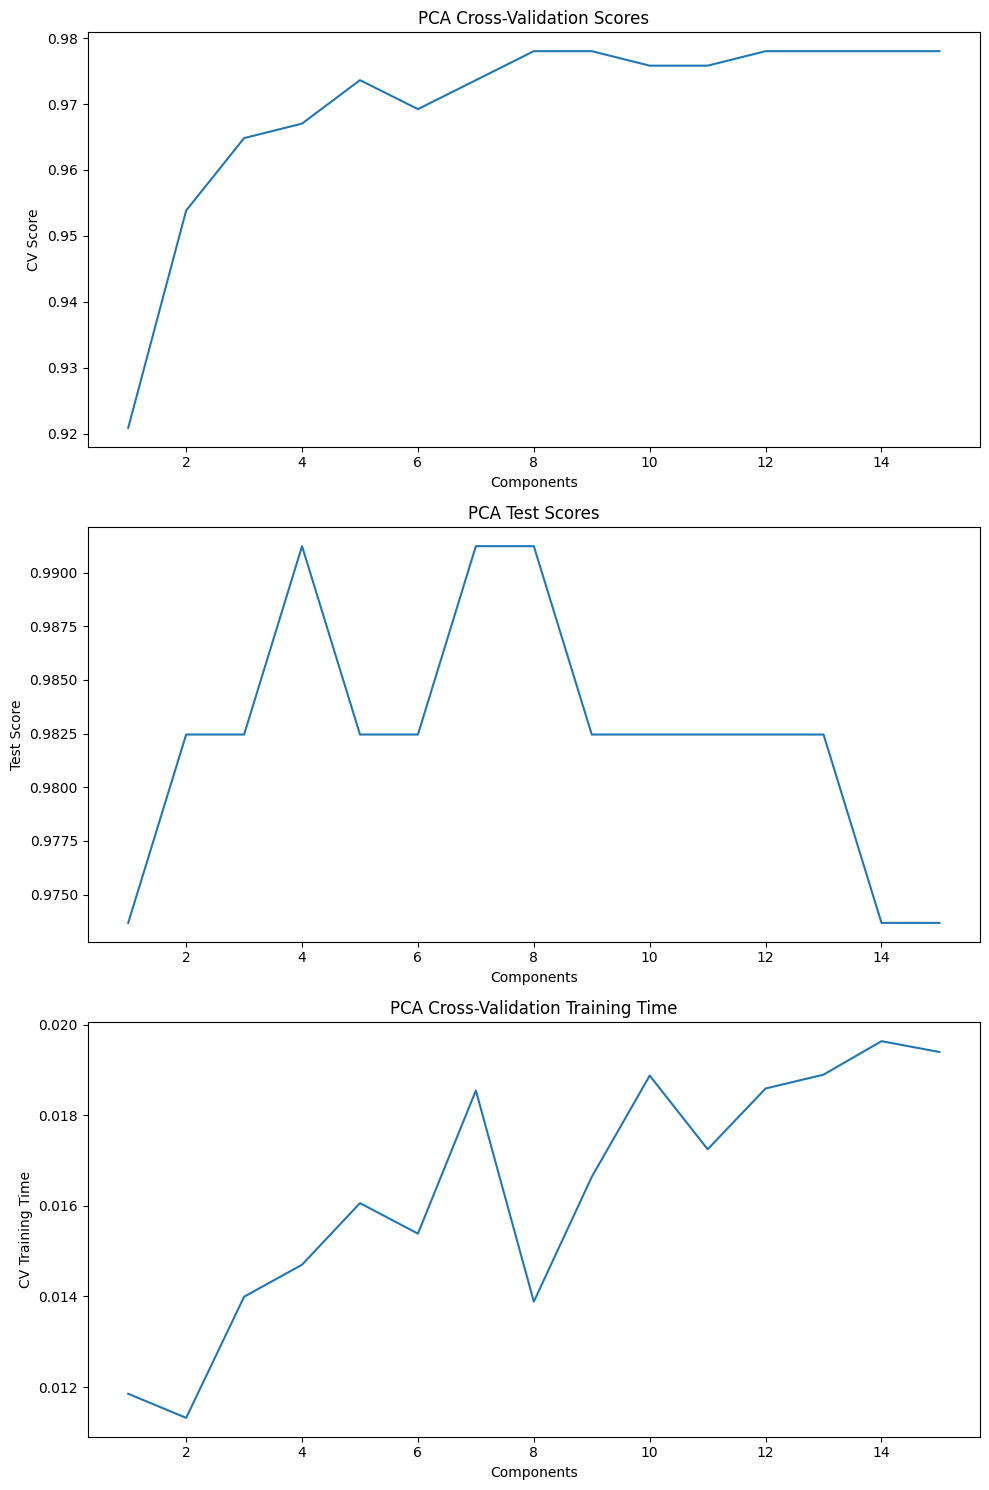

In [ ]:
PCA_curves(PCA_cv_score,PCA_test_score,PCA_cv_training_time)

<a id='6.7.2'></a><br>
#6.7.2. logistic Regression with PCA (8 components)


In [ ]:
i =PCA_test_score.index(max(PCA_test_score))
print('The best accuracy of logistic regression classifier is: %.3f'%  max(PCA_test_score)+', where the total number of components in PCA is {:.0f}'.format((i+1)*2))

The best accuracy of logistic regression classifier is: 0.991, where the total number of components in PCA is 8


The best parameters for classifier is {'C': 0.1, 'penalty': 'l2'}
The best training score is 0.967:
Accuracy=0.991
Sensitivity=0.977
Specificity=1.000
Precision=1.000
F-measure=0.988


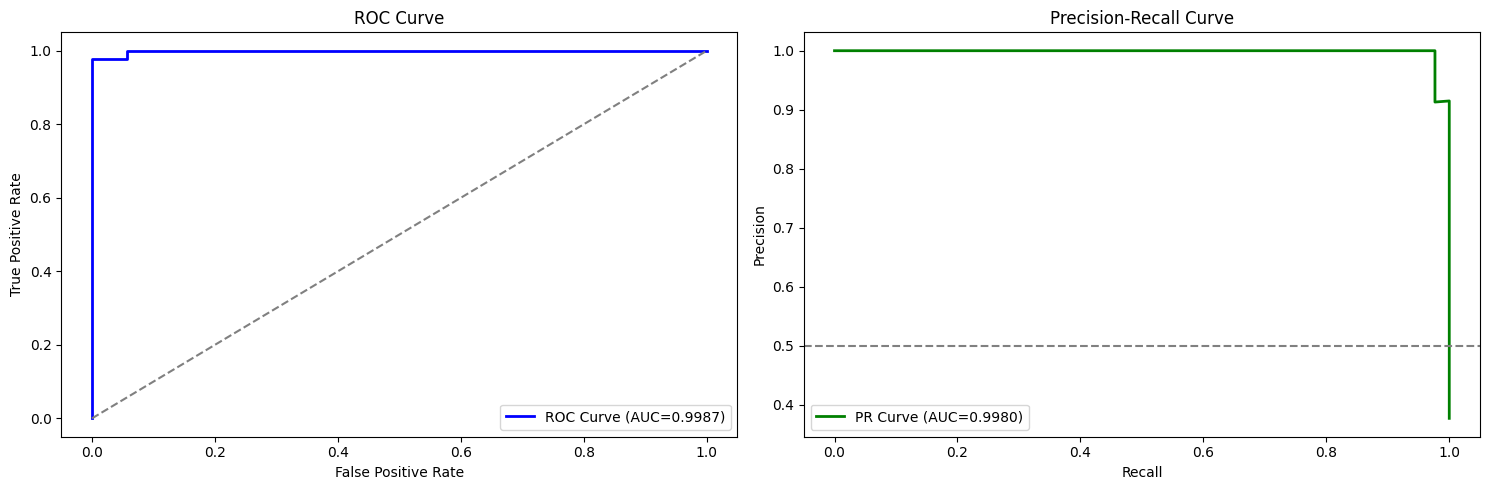

In [ ]:
pca = PCA(n_components=(i+1)*2, svd_solver="full",random_state=random_state)
X_PCA_train = pca.fit_transform(X_train)
X_PCA_test = pca.transform(X_test)
# Model Selection
cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)

# Classifier with the best hyperparameters
logReg_PCA = LogisticRegression(penalty = best_param['penalty'],
                            C = best_param['C'],
                            random_state=random_state)
logReg_PCA.fit(X_PCA_train, y_train)

# Metrics
logReg_PCA_metrics = metrics(X_PCA_test,logReg_PCA)

# ROC Curve & Precision-Recall Curves
y_score = logReg_PCA.predict_proba(X_PCA_test)[:, 1] # predict probabilities
plot_roc_prc()


<a id='6.8'></a><br>
#6.8. Model Performance Plot

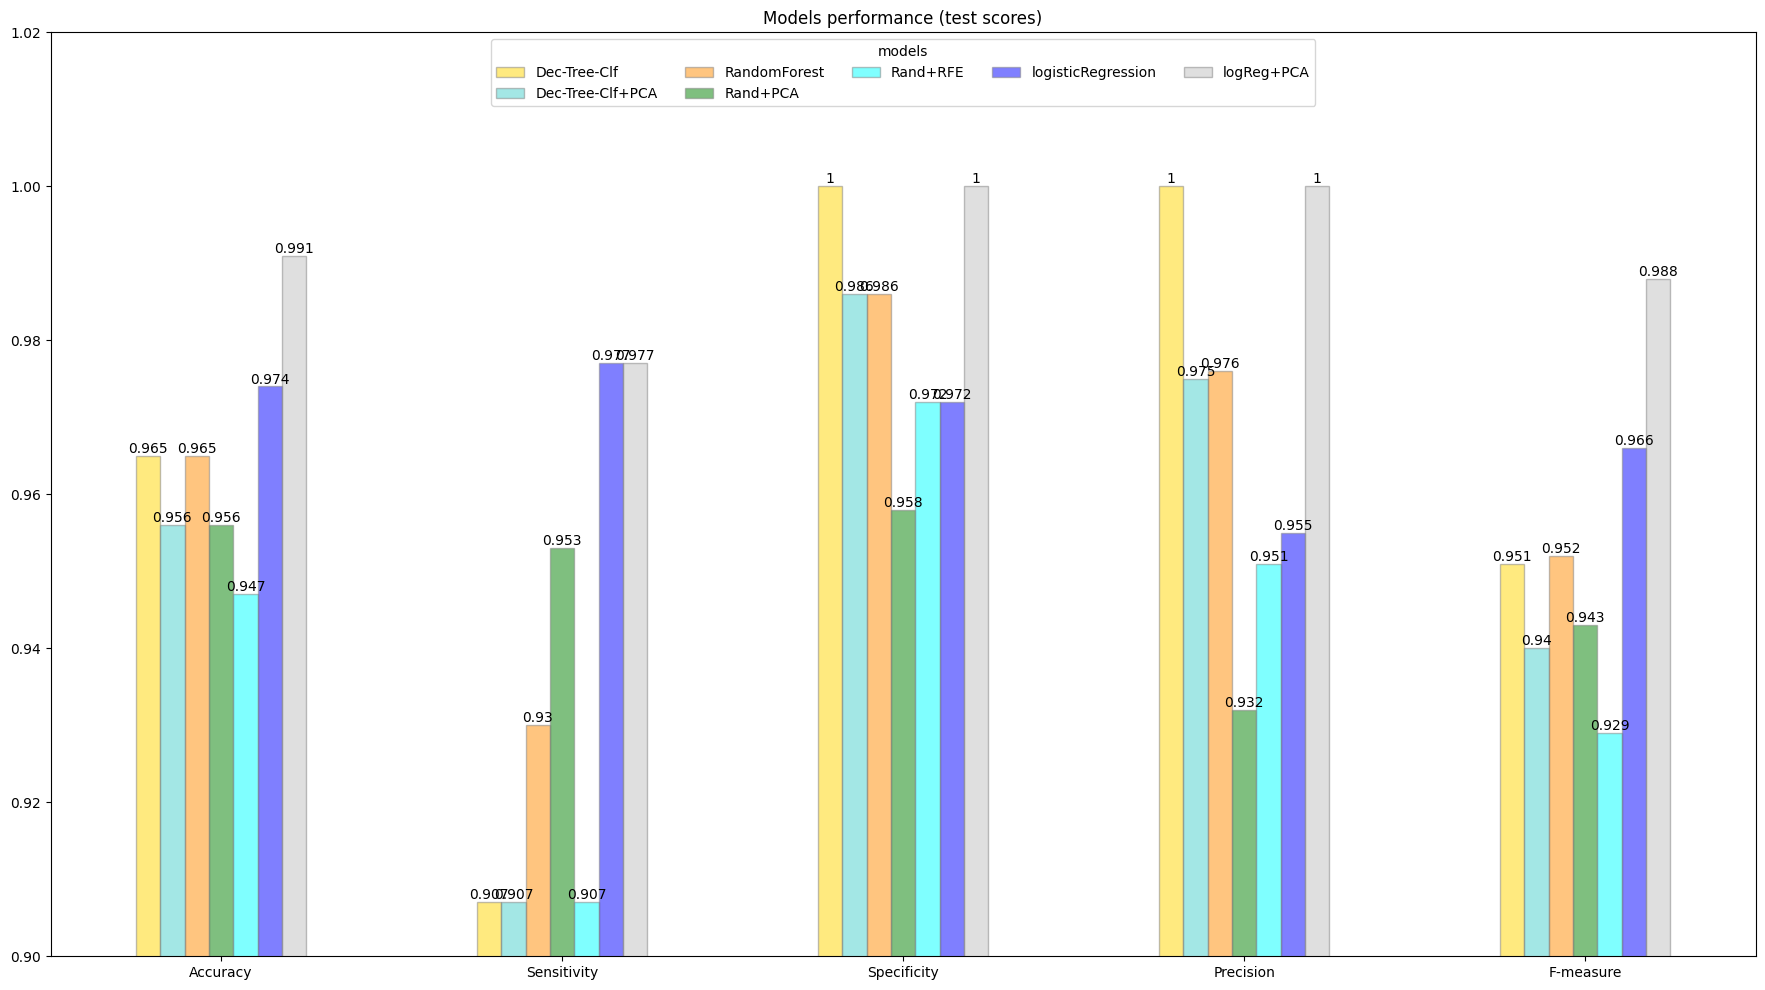

In [ ]:
models_metrics = {'Dec-Tree-Clf': [round(elem, 3) for elem in DecTree_clf_metrics],
                 'Dec-Tree-Clf+PCA': [round(elem, 3) for elem in DecTreeClf_PCA_metrics],
                 'RandomForest' : [round(elem, 3) for elem in rf_metrics],
                 'Rand+PCA' : [round(elem, 3) for elem in rf_PCA_metrics],
                 'Rand+RFE' : [round(elem, 3) for elem in rf_RFE_metrics],
                  'logisticRegression': [round(elem, 3) for elem in logReg_metrics],
                 'logReg+PCA': [round(elem, 3) for elem in logReg_PCA_metrics],
                }
index=['Accuracy','Sensitivity','Specificity','Precision', 'F-measure']
df_scores = pd.DataFrame(data = models_metrics, index=index)
ax = df_scores.plot(kind='bar', figsize = (22,12), ylim = (0.90, 1.02),
                    color = ['gold', 'mediumturquoise', 'darkorange', 'green','cyan', 'blue','silver'],
                    rot = 0, title ='Models performance (test scores)',
                    edgecolor = 'grey', alpha = 0.5)
ax.legend(loc='upper center', ncol=5, title="models")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In addressing the breast cancer classification problem, employing multiple machine learning (ML) models sheds light on the impact of dimensionality reduction techniques like PCA and RFE.

In the case of Logistic Regression, utilizing PCA noticeably enhances classification performance. This suggests that reducing dimensions aids in improving model accuracy, potentially due to the removal of redundant or correlated features.

Conversely, when employing Random Forest and Decision Tree classifiers, the classification metrics show no significant improvement with PCA or RFE. Despite the reduction in feature space leading to decreased training time, it does not translate into enhanced classification performance. This indicates that these ensemble-based models might not benefit from dimensionality reduction in this context.


* Grid Search CV for Hyperparameter Tuning: Grid Search CV is a technique used to find the best hyperparameters for a machine learning model. By exhaustively searching through a specified parameter grid and cross-validating the results, Grid Search CV helps identify the optimal hyperparameters that maximize model performance.
* Dimension Reduction Techniques: Dimension reduction techniques like Principal Component Analysis (PCA) or Recursive Feature Elimination (RFE) can help reduce the dimensionality of the feature space, leading to faster training times and potentially improved model performance. These techniques aim to retain the most important features while discarding redundant or irrelevant ones.


therefore, overall models performance > 95% and best accurracy is 99.1%

Thanks,
Jayabharathi Hari
Masters of Data Science - Deakin University.
